# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [3]:
%matplotlib inline

## Data Overview

- Observations
- Sanity checks

The initial steps to get an overview of any dataset is to:

- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [4]:
innData = pd.read_csv("INNHotelsGroup.csv")
innData.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [5]:
innData.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [6]:
# check shape of innHotel dataset
innData.shape

(36275, 19)

In [7]:
# Check the data types of the columns for the innHotell dataset
innData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
# check duplicates if any
innData.duplicated().sum()

0

In [9]:
# check missing values if any
innData.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
# Statistical summarry on the numerical dataset
innData.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

### Observations ###
  -  There are 36,275 rows and 19 columns.
  -  `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type` and `booking_status` is a string object.
  -  `booking_status` takes the two values as `Cancelled` or `Not Cancelled` - this can be considered as a categorical variable and may be imputed as       `ZERO` as `Cancelled` / `ONE` as `Not Cancelled`
  -  Need to build a model for `booking_status` a.k.a can be `Y target`
  -  All other columns OR features from `machine learning perpective`, can be referred as `features variable`   
### Sanity checks ###
  -  There are no duplicates.
  -  There are no missing values, that means missing values treatment may not be required before building up the model 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

## Perform Univariate analysis

- Based on the data type - float64/int64, draw the histogram/boxplot.

    - `no_of_adults`
    - `no_of_children`
    - `no_of_weekend_nights`
    - `no_of_week_nights`
    - `required_car_parking_space`
    - `lead_time`
    - `arrival_year`
    - `arrival_month`
    - `arrival_date`
    - `repeated_guest`
    - `no_of_previous_cancellations`
    - `no_of_previous_bookings_not_canceled`
    - `avg_price_per_room`
    - `no_of_special_requests`
      
      <br>

- Based on the data type - Object, draw the barplot. 

    - `Booking_ID`
    - `type_of_meal_plan`
    - `room_type_reserved`
    - `market_segment_type`
    - `booking_status`

**`Method` commonly used to draw histogram and box plot together and get crisp visuals designed for `numerical` variables**

In [11]:
# Reusable code  
# Visualize both the histogram and box plot for each variable to gain clear insights into the data distribution and characteristics.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**Method commonly used to draw bar plot  and get crisp visuals - designed for `categeorical` variables**

In [12]:
# Reusable code  
# Visualize the bar plot for each variable to gain clear insights into the data characteristics.

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Data analysis for all numerical columns to understand 
- Outliers
- Data distribution 

**`no_of_adults`**

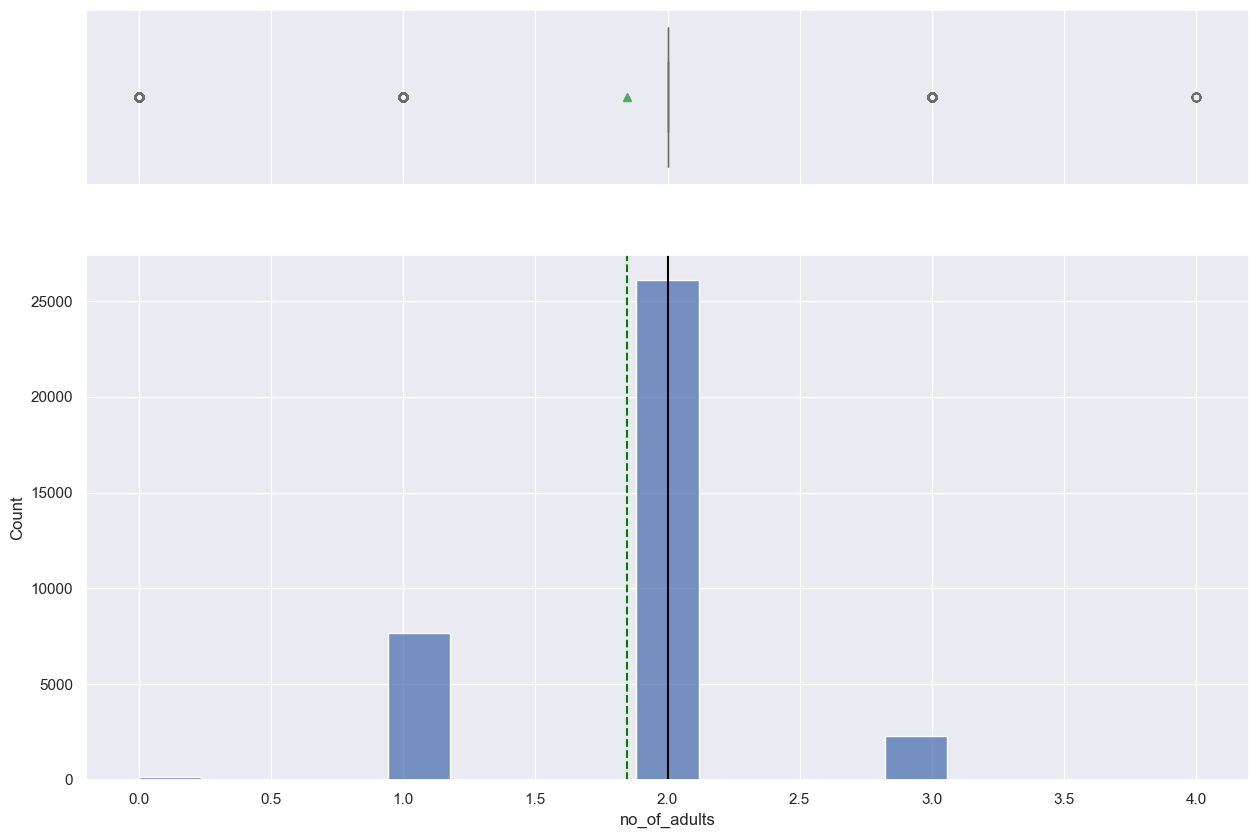

In [13]:
histogram_boxplot(innData, "no_of_adults")

In [14]:
innData["no_of_adults"].value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

- Mean (green line) is less than median (black line) - indicate data distibution is slightly left skewed.
- Its evident based on the histogram and boxplot
- Middle most observation (median) is 2 adults which make sense most of the time
- There are also a few outliers on both side of the whisker - like 139 rows have zero adults and which may require some treatment and also, 16 rows with adult count as 4. Let's continue to investigate ...

**`no_of_children`**

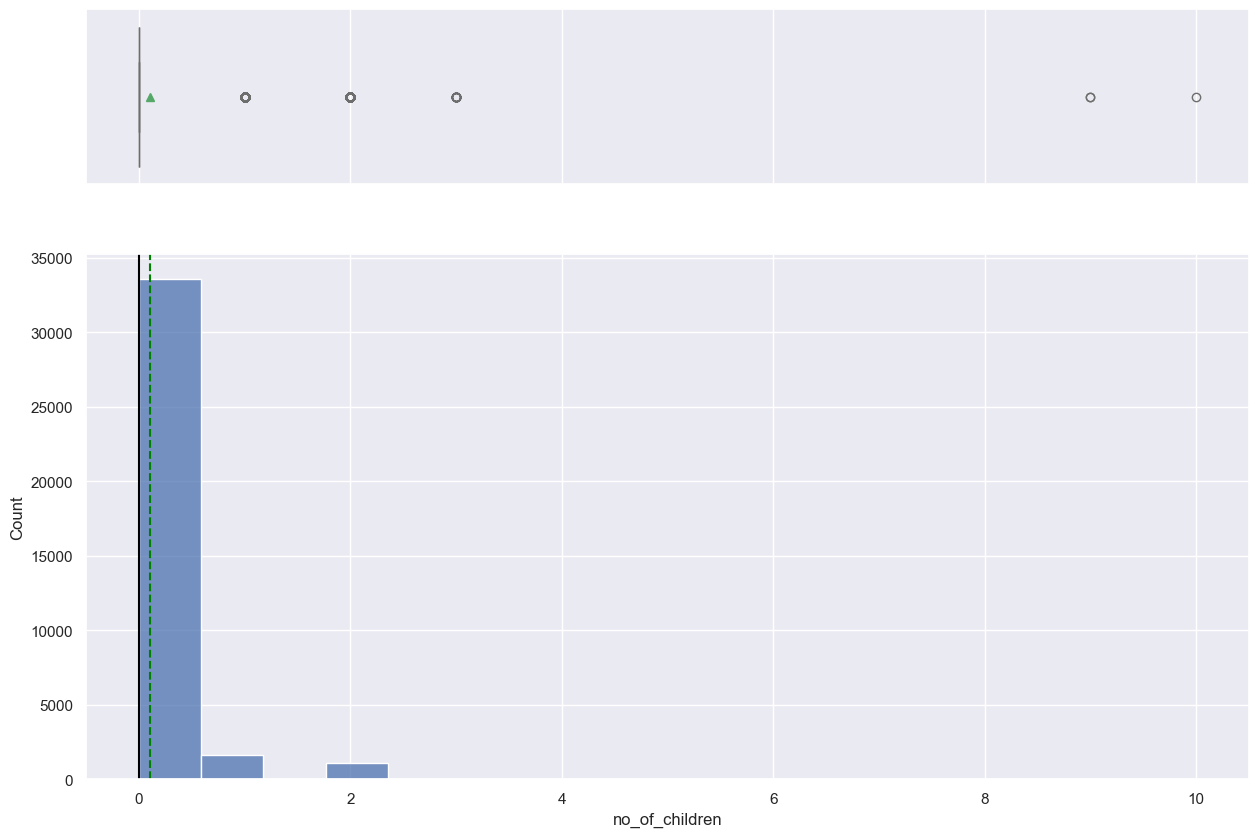

In [15]:
histogram_boxplot(innData, "no_of_children")

In [16]:
innData["no_of_children"].value_counts()

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

- Mean (green line) is greater than median (black line) - indicate data distibution is slightly right skewed.
- Its evident based on the histogram and boxplot
- Middle most observation (median) is 0 children (# of records - 33577) which is evident based on the data
- There are also a few outliers on the right side of the whisker - like 1 rows with ten children and 2 rows with nine children which may require some treatment. Let's continue to investigate ...

**`no_of_weekend_nights`** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

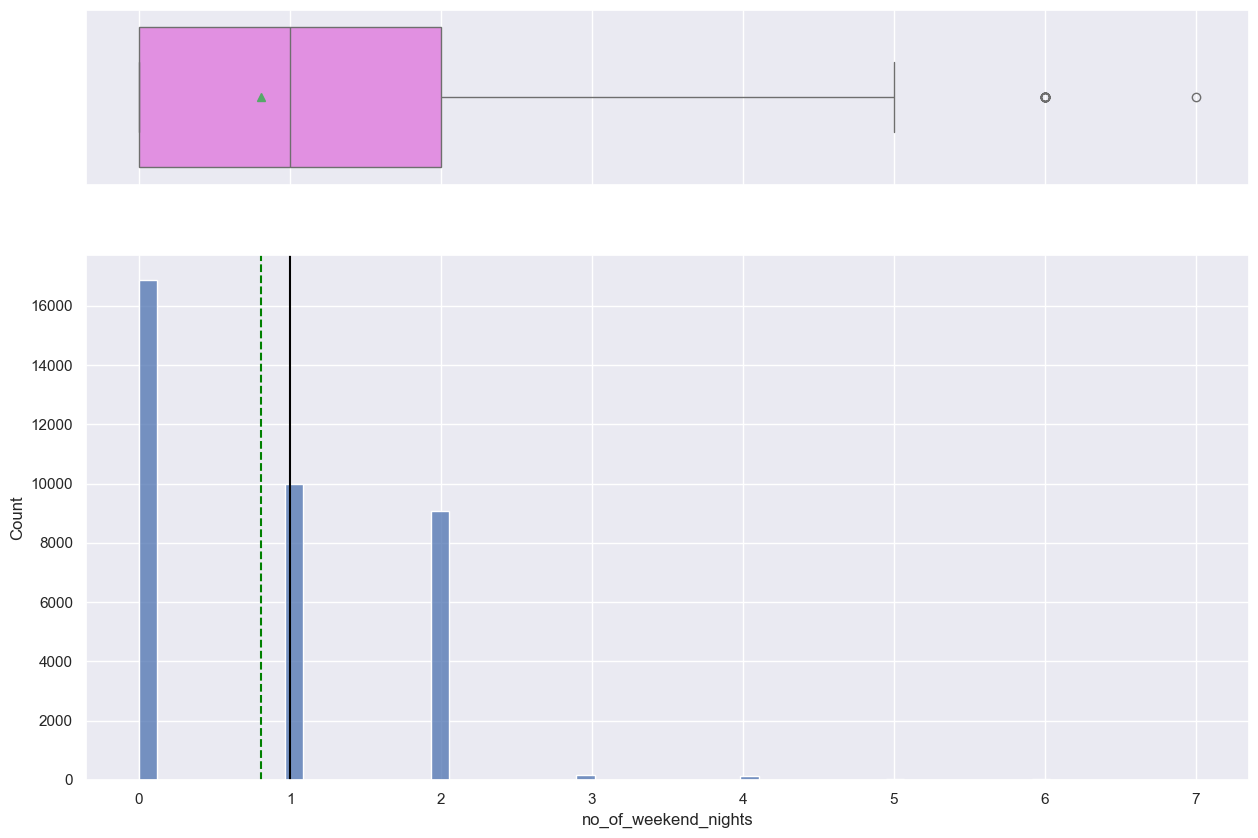

In [17]:
histogram_boxplot(innData, "no_of_weekend_nights")

In [18]:
innData["no_of_weekend_nights"].value_counts()

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

- **`no_of_weekend_nights`** being **`zero`** is not making much sense. BUT, I may be wrong
- Almost 25% of customers prefer for 1 weekend night and 25% of customers prefered 2 weekend nights
- There are edge cases a.k.a outliers like with 3,4,5,6,7 weekend nights
- Let's continue to investigate ...

**`no_of_week_nights`** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

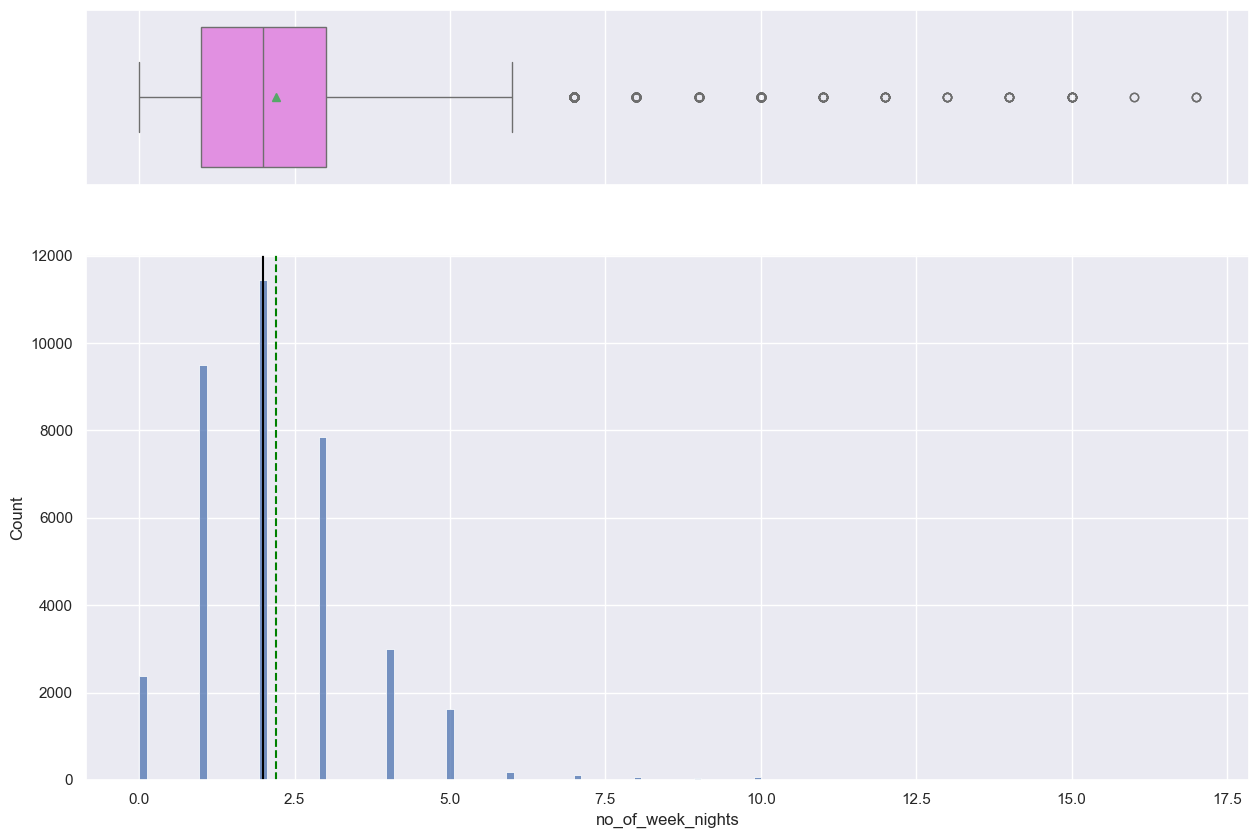

In [19]:
histogram_boxplot(innData, "no_of_week_nights")

In [20]:
innData["no_of_week_nights"].value_counts()

no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

- Mean (green line) is greater than median (black line) - indicate data distibution is slightly right skewed.
- **`number_of_week_nights`** being **`zero`** is not making much sense. BUT, I may be wrong
- There are edge cases a.k.a outliers like with varying from 6 nights to 16 nights 
- Let's continue to investigate ...

**`required_car_parking_space`** - Does the customer require a car parking space? (0 - No, 1- Yes)

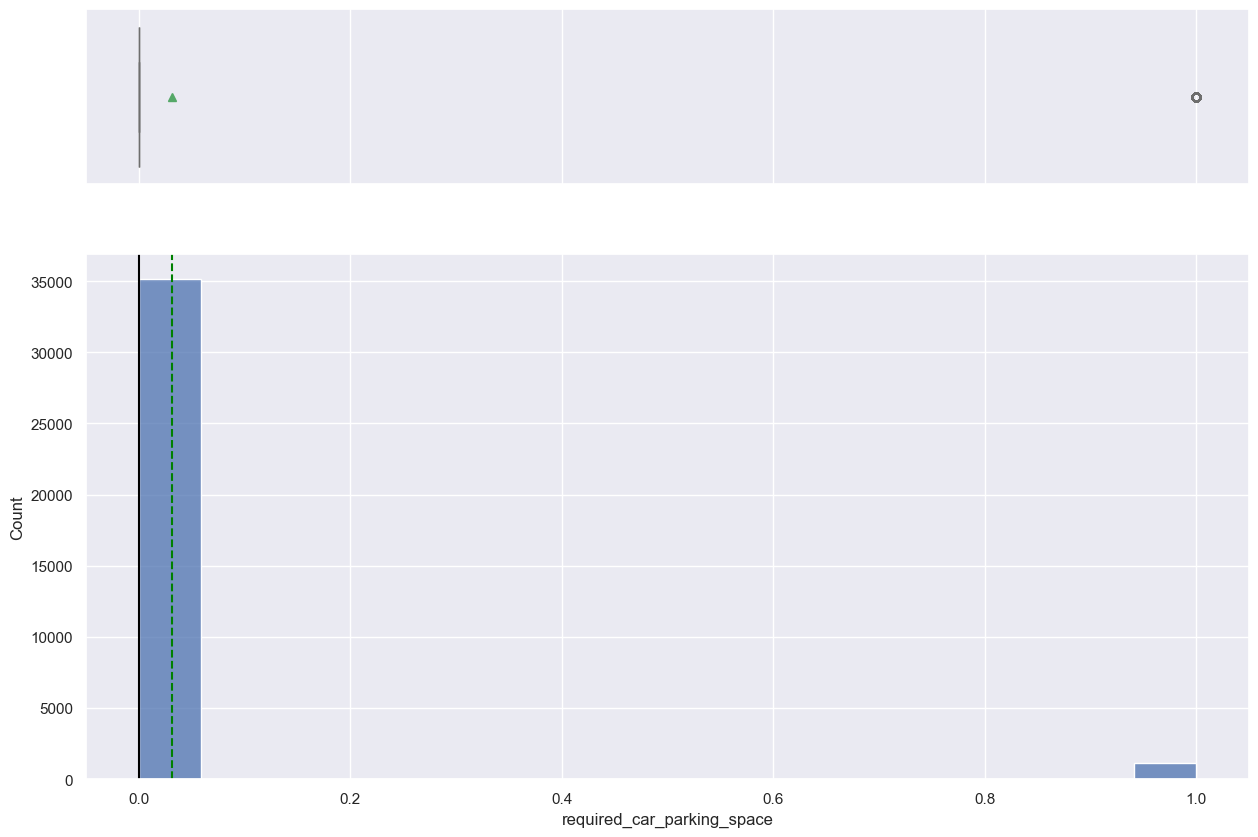

In [21]:
histogram_boxplot(innData, "required_car_parking_space")

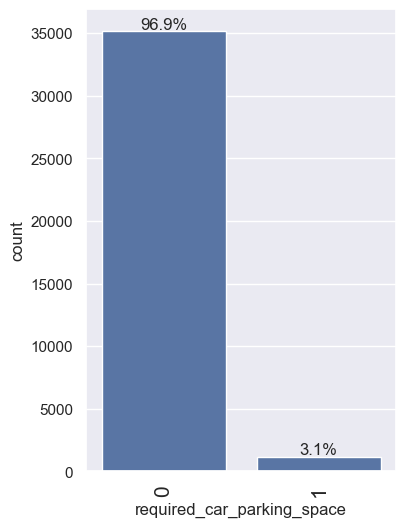

In [22]:
labeled_barplot(innData, "required_car_parking_space", perc=True)

In [23]:
innData["required_car_parking_space"].value_counts()

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64

- The mean (green line) is greater than the median (black line), indicating that the data distribution is slightly right-skewed
- The **`required_car_parking_space`** variable contains only two values: 0 (means no) and 1 (means yes).
  
   - While it’s currently stored as a numeric type, it would be more appropriate to treat it as an object (categorical variable), since it represents binary categories. That said, we can proceed with it as-is for now.
- Almost 97% of customers do not require car parking space - thats a strange behavior in terms of common sense, BUT
- Let's continue to investigate ..

**`lead_time`** : Number of days between the date of booking and the arrival date

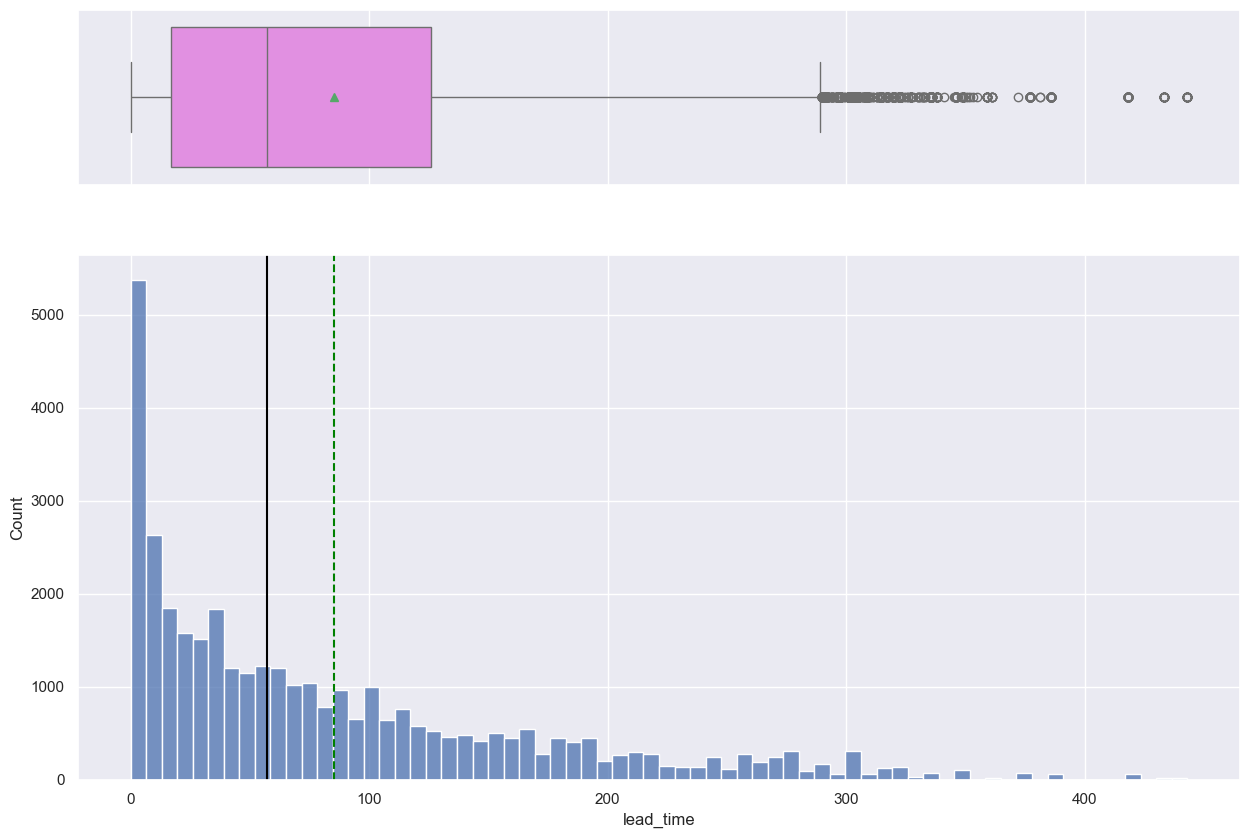

In [24]:
histogram_boxplot(innData, "lead_time")

In [25]:
innData["lead_time"].describe()

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

- The mean (green line) is greater than the median (black line), indicating that the data distribution is highly right-skewed
- On an average the lead time is 85 days and most observered (median) is 57 days.
- 75% customers have book the hotel with lead time of 126 days (3-4 months in advance) which looks reasonable, but not sure. 
- There are many outliers where customer has booked rooms with 300 / 400 days in advance.

**`arrival_year`**: Year of arrival date

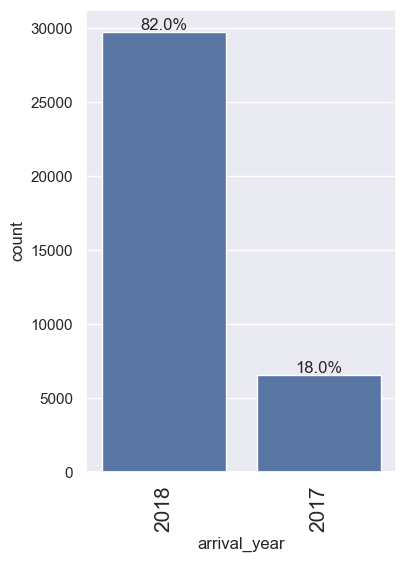

In [26]:
labeled_barplot(innData, "arrival_year", perc=True)

- 82% customer arrived in 2018
- 18% customer arrived in 2017

**`arrival_month`** : Month of arrival date

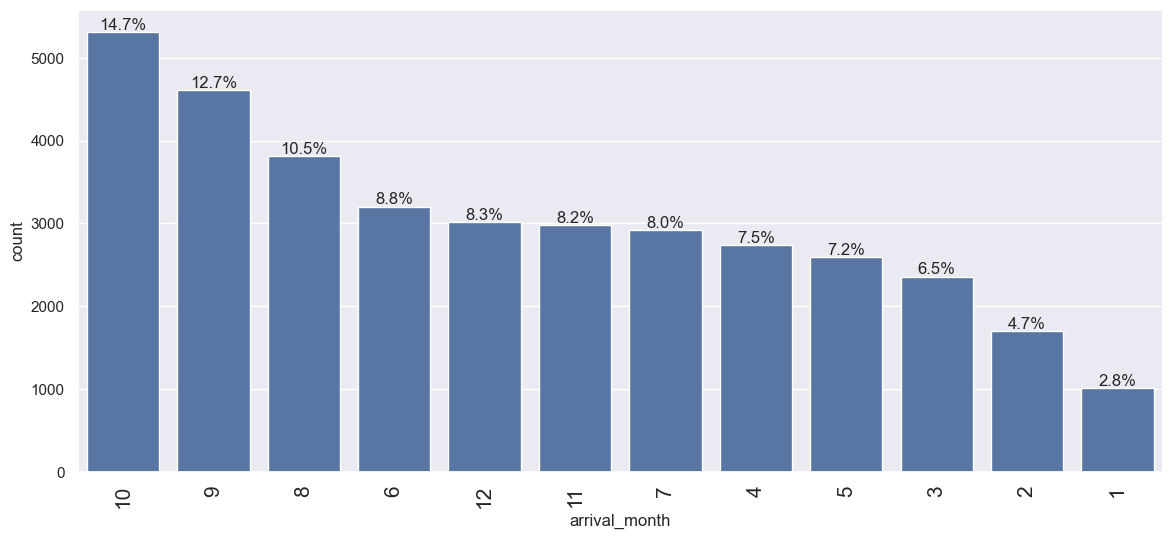

In [27]:
labeled_barplot(innData, "arrival_month", perc=True)

In [28]:
innData["arrival_month"].value_counts()

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64

- October sees the highest number of customer arrivals, followed by September and August, suggesting strong demand during the late summer.
- The summer period (June–August) also shows significant customer activity, aligning with typical holiday/travel seasons.
- January and February record the lowest number of arrivals, likely due to off-season travel and post-holiday slowdowns.
- It seems and make sense that in Q3 to early Q4 (Aug–Oct) could be the busiest period for the hotel, possibly due to favorable weather, local events, or vacation trends.

**`arrival_date`** : Date of the month

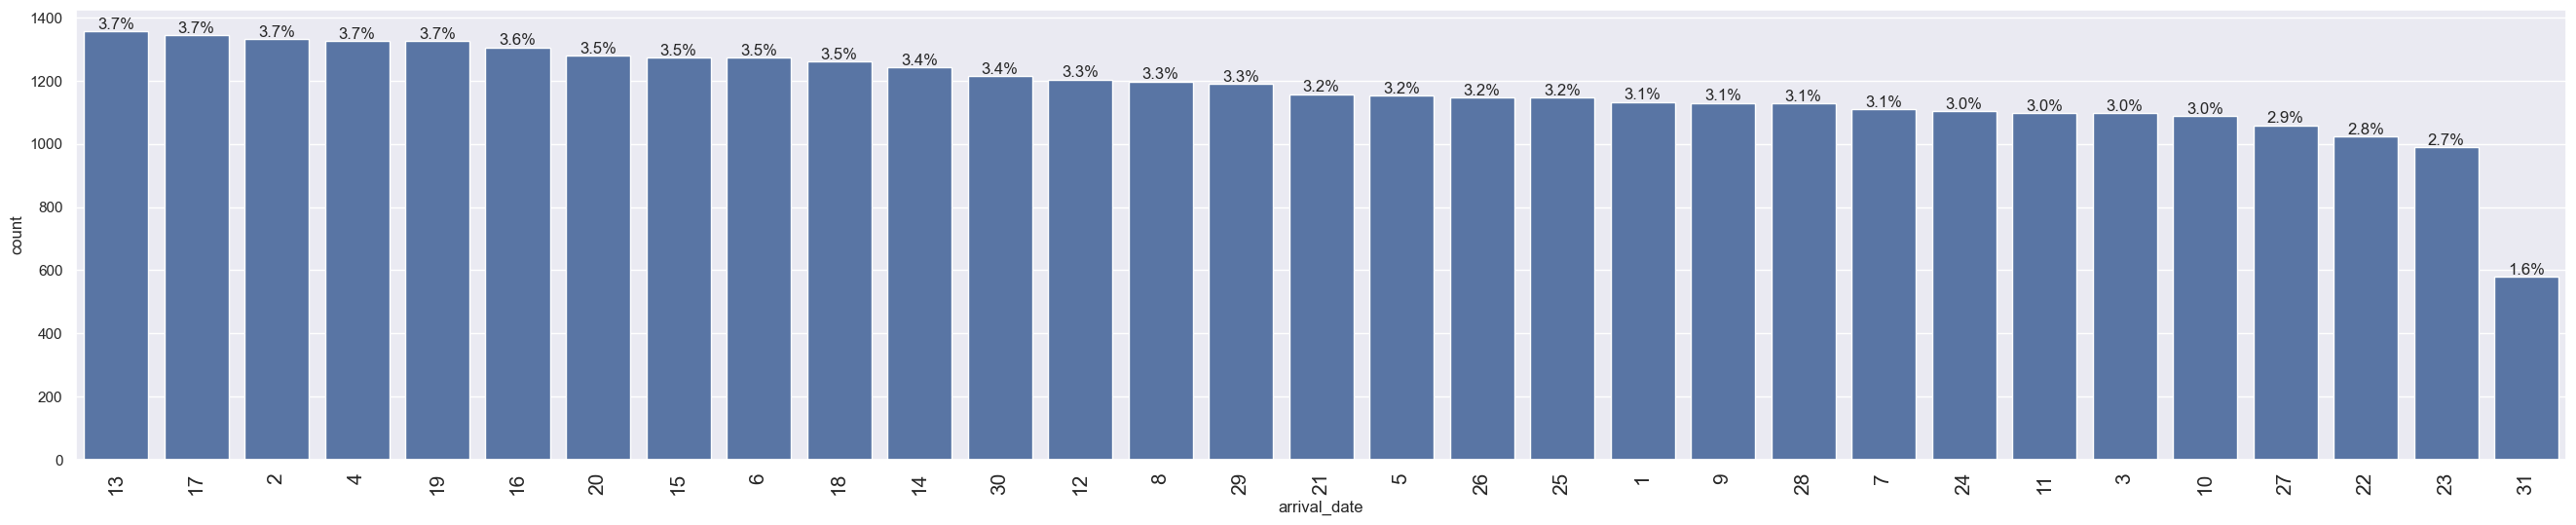

In [29]:
labeled_barplot(innData, "arrival_date", perc=True)

In [30]:
innData["arrival_date"].value_counts()

arrival_date
13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: count, dtype: int64

- Arrival behavior is spread fairly evenly across the month.
- While a few dates like the 13th and 17th have slightly higher arrivals, there’s no clear preference for the start, middle, or end of the month. This suggests that factors like weekdays, promotions, or events likely influence booking patterns more than the calendar date itself.

**`repeated_guest`**: Is the customer a repeated guest? (0 - No, 1- Yes)

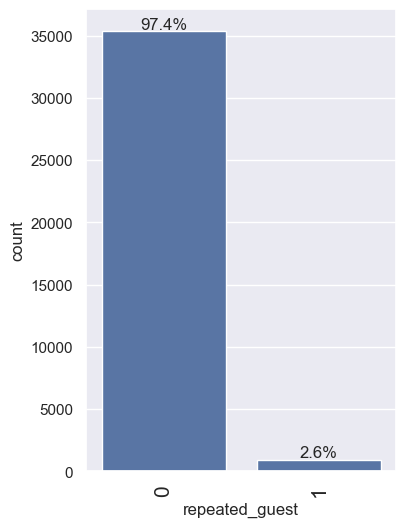

In [31]:
labeled_barplot(innData, "repeated_guest", perc=True)

In [32]:
innData["repeated_guest"].value_counts()

repeated_guest
0    35345
1      930
Name: count, dtype: int64

- Only 2.6% guest are repeated, It might need to do with the services hotel provide
- It might be related to the cost of room per night hotel offers
- Lets continue to 

**`no_of_previous_cancellations`**: Number of previous bookings that were canceled by the customer prior to the current booking

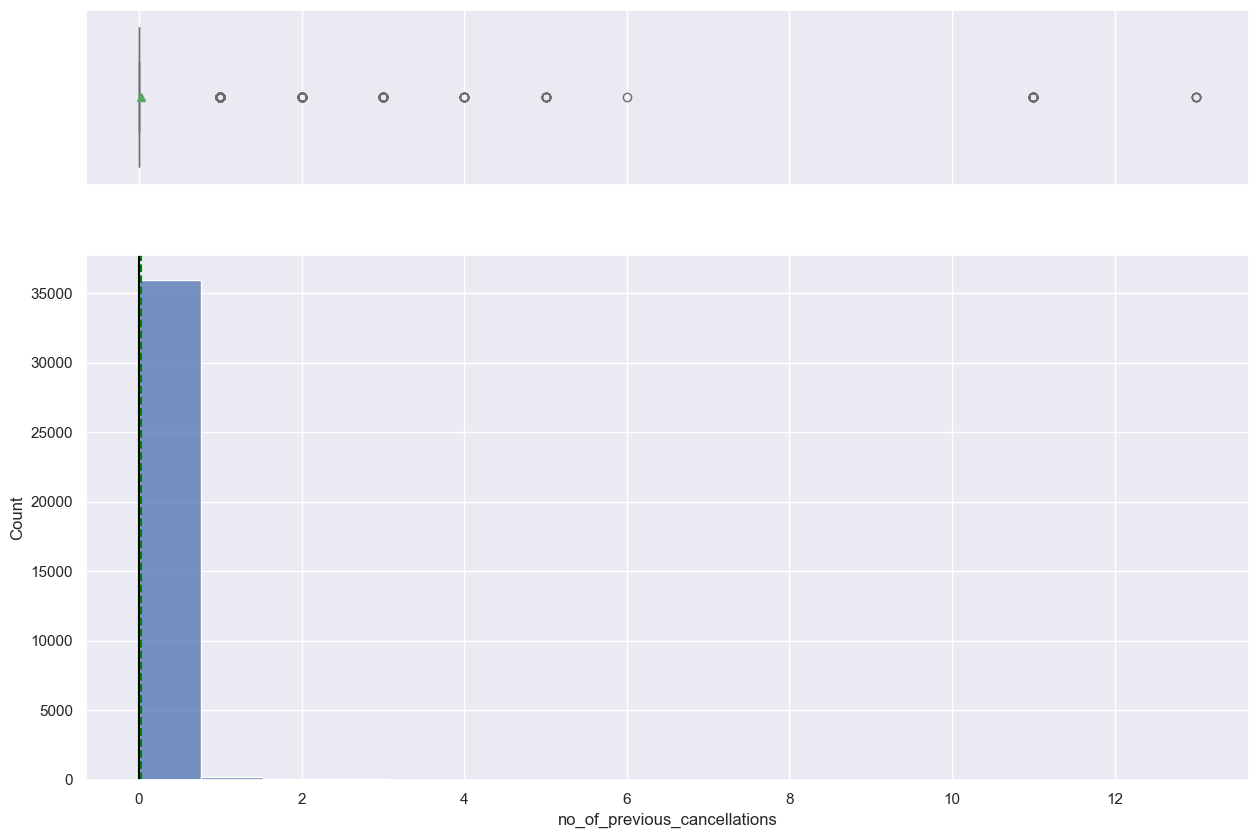

In [33]:
histogram_boxplot(innData, "no_of_previous_cancellations")

In [34]:
innData["no_of_previous_cancellations"].value_counts()

no_of_previous_cancellations
0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

- 35,937 customers (~98.5%) have never canceled a booking in the past.
- Only a small percentage have canceled once or more, and the count drops sharply as the number of cancellations increases.
- Some canceled 13 or even 6 times, but these are extremely rare
- The vast majority of customers have a clean booking history with no prior cancellations.
- The customer base is generally reliable.
- Clearly its evident that we do have outliers

**`no_of_previous_bookings_not_canceled`** : Number of previous bookings not canceled by the customer prior to the current booking

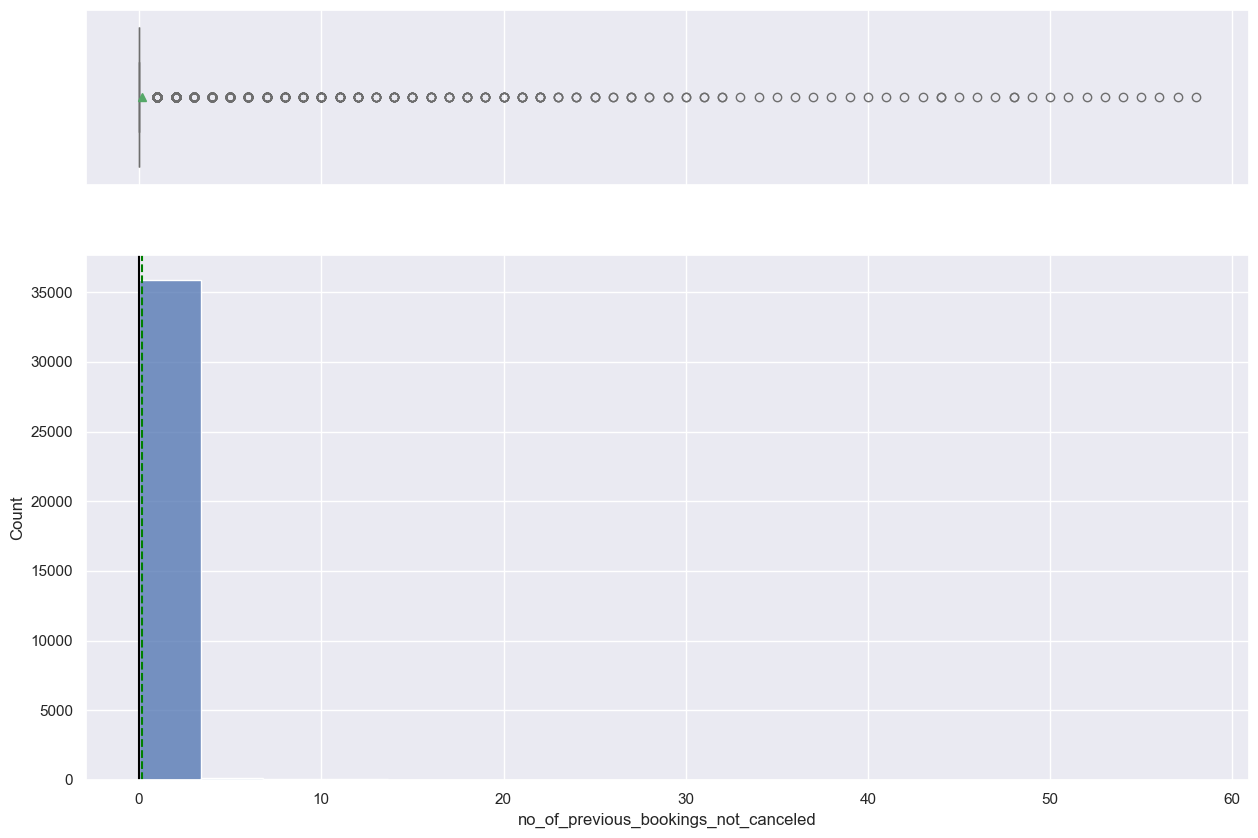

In [35]:
histogram_boxplot(innData, "no_of_previous_bookings_not_canceled")

In [36]:
innData["no_of_previous_bookings_not_canceled"].value_counts()

no_of_previous_bookings_not_canceled
0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: count, dtype: int64

- A huge majority of customers (~35,463 or ~98.5%) are first-time guests (i.e., they have 0 previous successful bookings).
- The number of customers declines sharply as the count of past non-canceled bookings increases.
- The hotel has a high volume of new customers, and repeat guests are very rare.
- There may be limited customer loyalty or incentives for repeat bookings

**`avg_price_per_room`** : Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

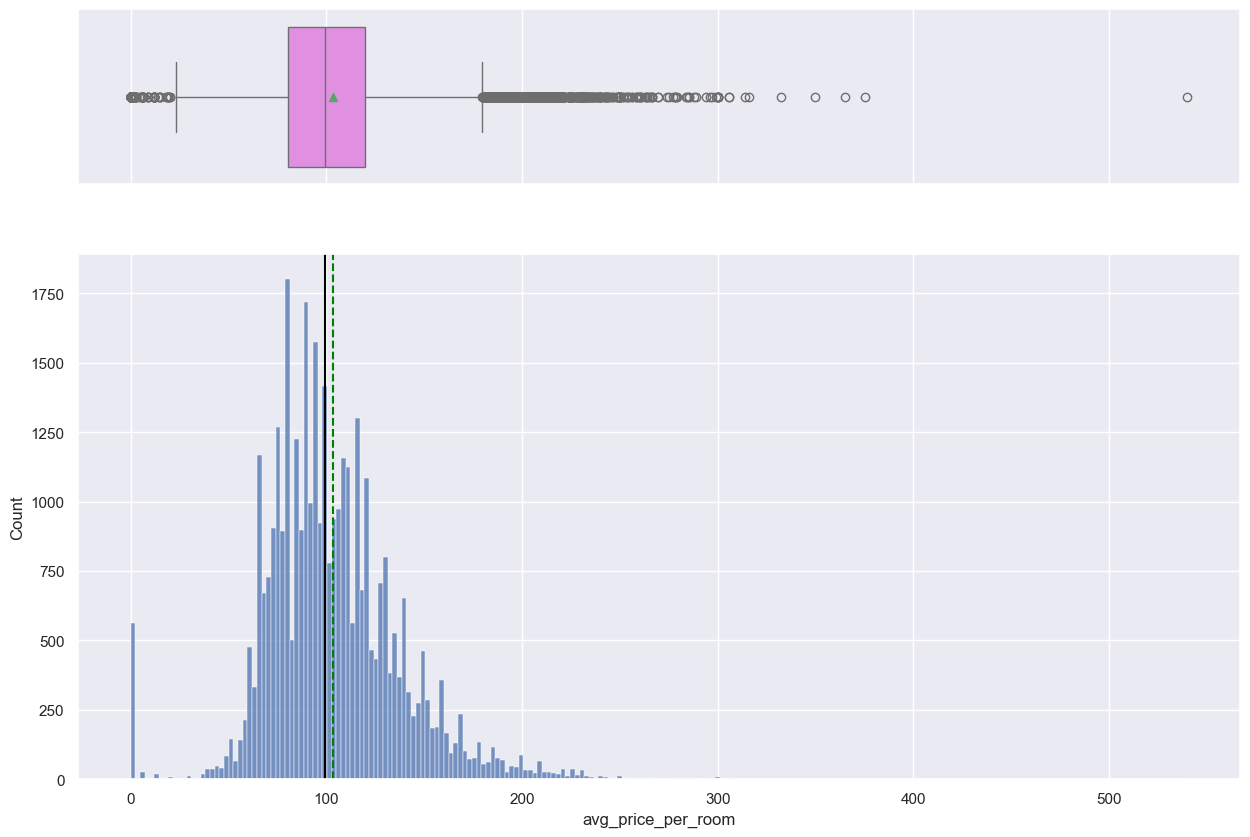

In [37]:
histogram_boxplot(innData, "avg_price_per_room")

In [38]:
innData["avg_price_per_room"].describe()

count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

- The mean (green line) is greater than the median (black line), indicating that the data distribution is right-skewed
- On an average the price per room is 103 euros and most observered (median) is ~100 euros.
- 75% customers have book the room with ~ 120 euros
- Few outliers like room booked at the price of 540 euros, might be very rare but there are.

**`no_of_special_requests`** : Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

In [39]:
innData["no_of_special_requests"].value_counts()

no_of_special_requests
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: count, dtype: int64

- About 50% of customers (~19,777) made no special requests at all.
- Most of the remaining guests made just 1 or 2 requests
- Requests beyond 3 are very rare, showing that demand for high customization is not so much or at minimum.
- The majority of guests appear to be low-maintenance or flexible with room conditions.
- A smaller group (~40% with number of requests 1 and 2) does express moderate personalization needs, such as room location or amenities.

**`booking_status`** : Flag indicating if the booking was canceled or not.

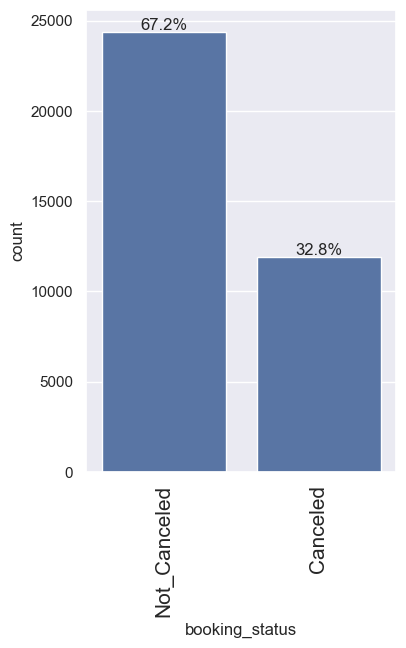

In [40]:
labeled_barplot(innData, "booking_status", perc=True)

- 67% guests have not cancelled the booking
- 33% guests have cancelled the booking - this is a signification % of cancellation.

**`type_of_meal_plan`** : Type of meal plan booked by the customer:
Not Selected – No meal plan selected
Meal Plan 1 – Breakfast
Meal Plan 2 – Half board (breakfast and one other meal)
Meal Plan 3 – Full board (breakfast, lunch, and dinner)

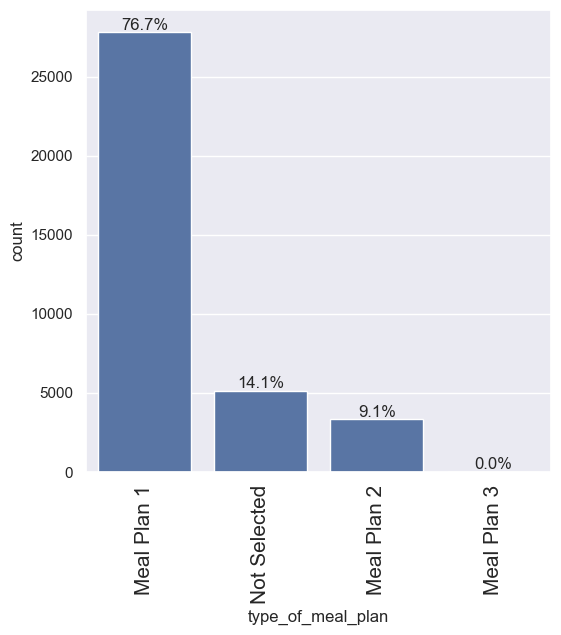

In [41]:
labeled_barplot(innData, "type_of_meal_plan", perc=True)

- 77% guests selected Meal Plan 1 and 9% selected Meal Plan 2
- 14% guests selected no Mean Plan
- No guest selected Meal Plan 3

**'room_type_reserved'** : Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

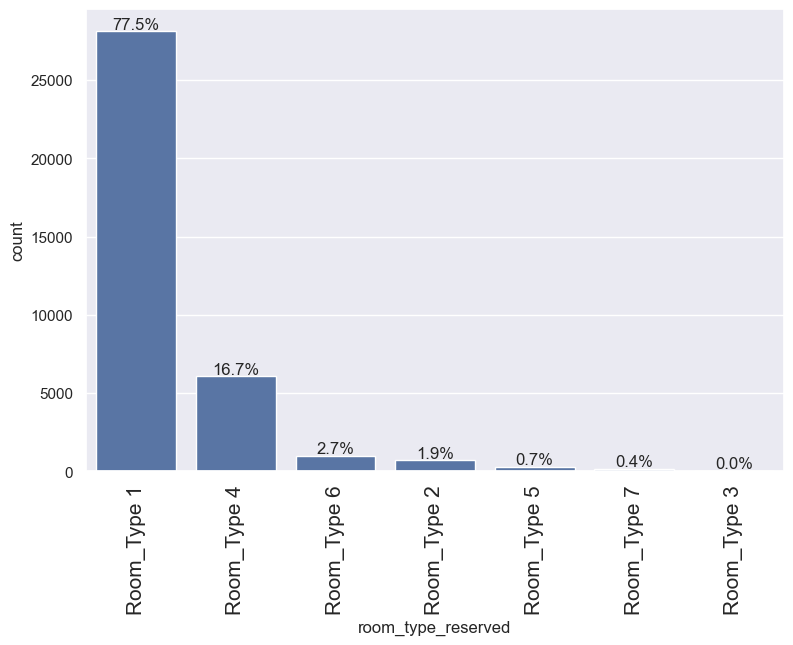

In [42]:
labeled_barplot(innData, "room_type_reserved", perc=True)

- 77.5% guests selected room_type 1 followed by 16.7% room_type4
- very few guests selected other room_types 6,2,5,7
- no one selected room_type3.

**`market_segment_type`**: Market segment designation.

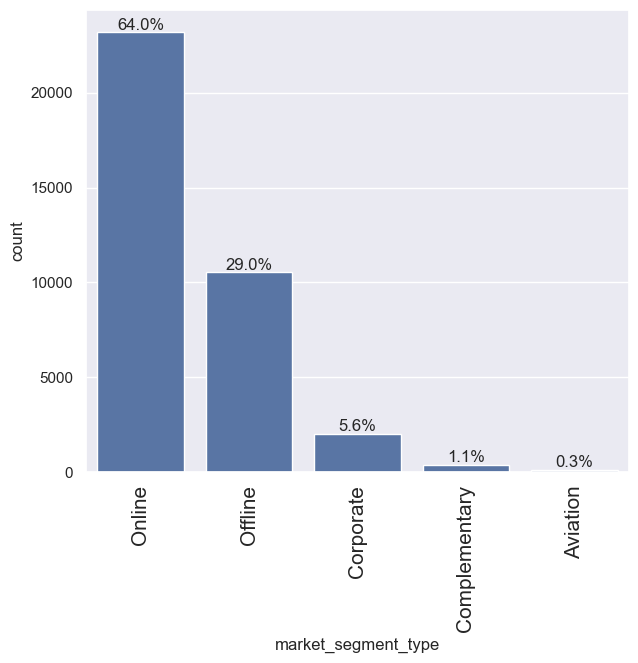

In [43]:
labeled_barplot(innData, "market_segment_type", perc=True)

- 64% booking done online
- 29% booking done offline
- 5.6% booking thru Corporate
- Very minimal booking thru Complementary and Aviation

This infers that online booking play a critical role in revenue followed by offline booking

## Perform Bivariate Analysis

In [44]:
innData_attr = innData.iloc[:, 0:20]
print(innData_attr.dtypes)

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object


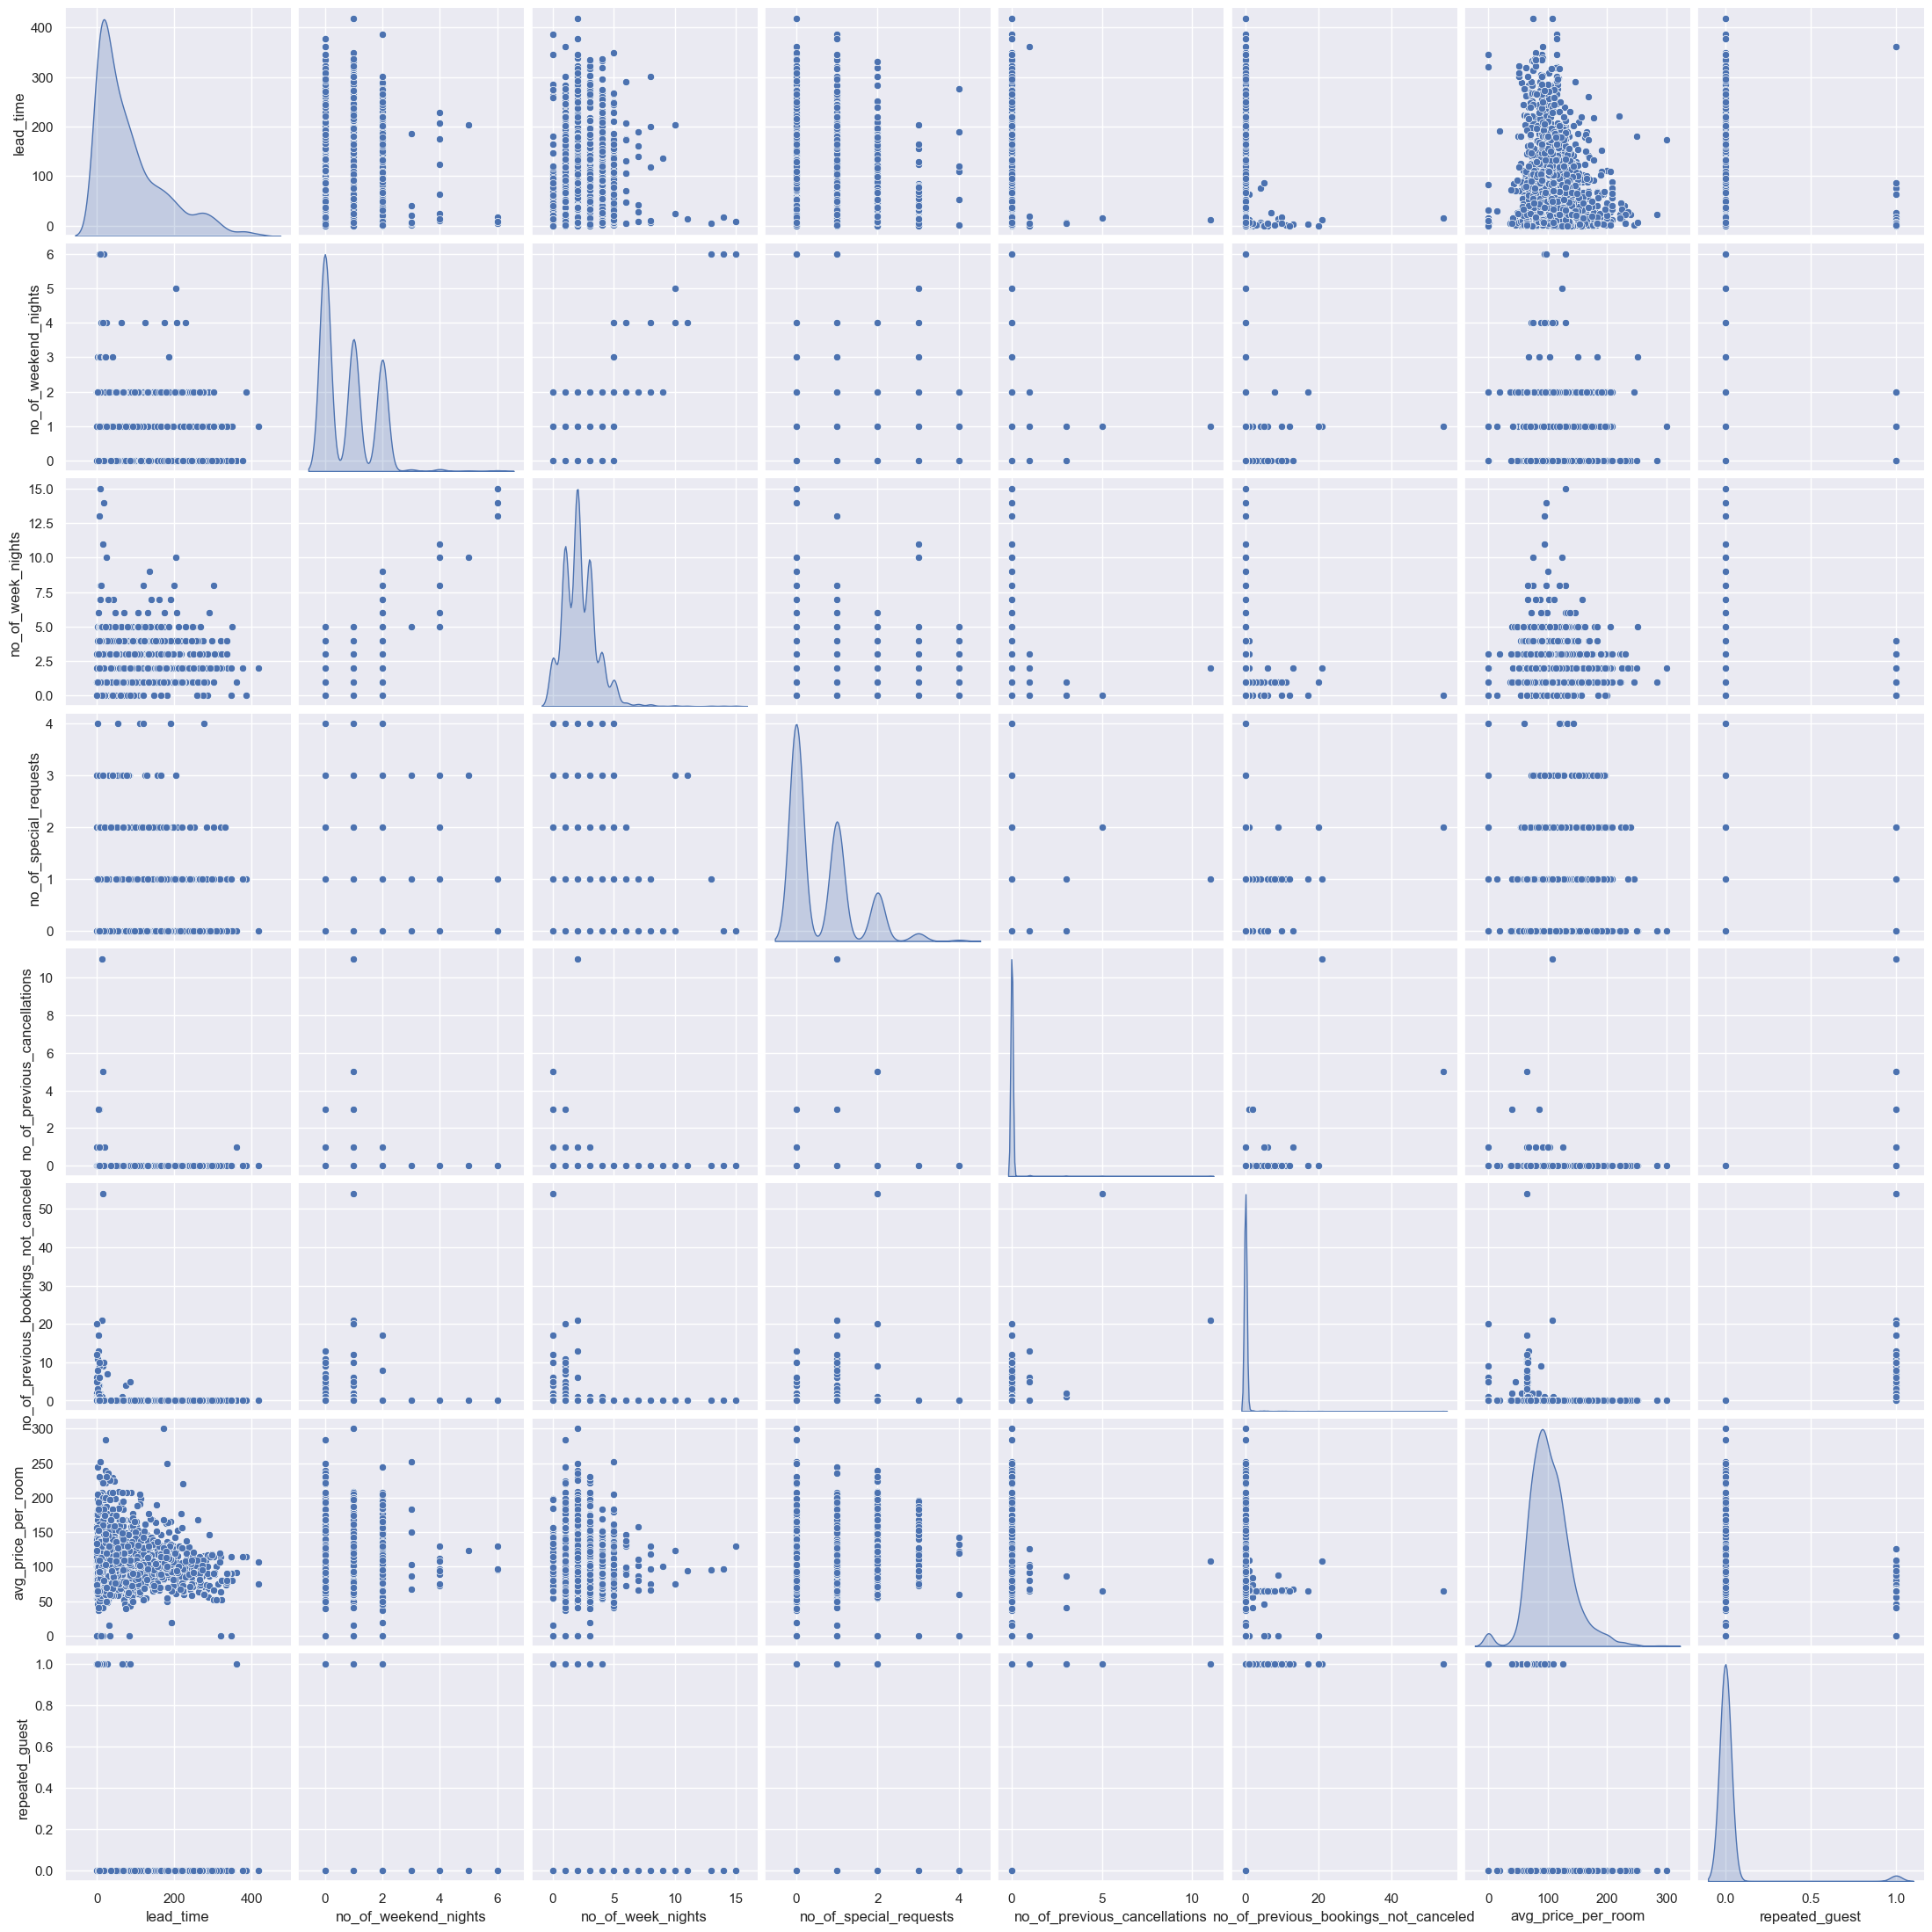

In [45]:
#innData size is too huge to draw and pairplot to understand the patterns between the features
# we need to decide data size and important features to understand the relationship and pattern between them
# i choose randomnly 2000 records out of 36,000 and dropping the features like Booking_ID, no_of_adults, no_of_children, required_car_parking_space, 
# arrival_year, arrival_month and arrival_date and selecting 'lead_time', 'no_of_weekend_nights', 'no_of_week_nights', 'no_of_special_requests', 
# 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'repeated_guest'

# Sample a subset for faster and cleaner plotting
sampled_data = innData.sample(n=2000, random_state=42)  # random_state=42, so that it generate the same output
selected_cols = [
    'lead_time',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'no_of_special_requests',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'avg_price_per_room',
    'repeated_guest'
    ]
sns.pairplot(sampled_data[selected_cols], diag_kind="kde", height=2.8)
plt.show()

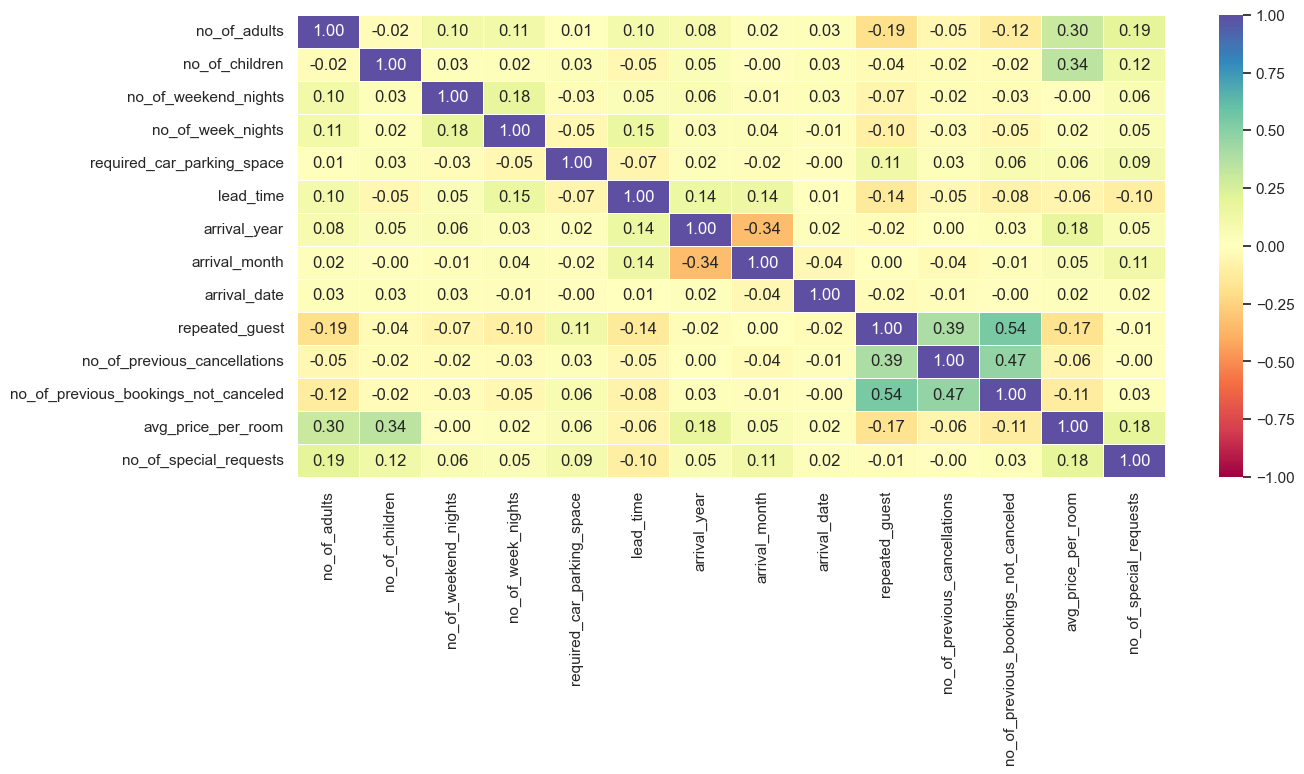

In [46]:
# create heatmap to understand correlation strength between all the x variables
num_cols = innData.select_dtypes(include=np.number).columns.tolist()
# dropping booking_id from list of numerical columns as they are not numerical in nature
#num_cols.remove("booking_id")
# Set larger figure size
plt.figure(figsize=(14, 6))

sns.heatmap(
    innData[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral", linewidths=0.5, linecolor='white'
)
plt.show()

- No linear relationship between the independent variables and its expected. This is a classification problem and is a sigmoid function.

## Based on the Data Analysis done above, I'll try to answer the questions being asked. As required, more analysis may be needed to answer few questions and I will elaborate more as I continue to seek answers ##

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**1. What are the busiest months in the hotel?**

In [47]:
innData["arrival_month"].value_counts()

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64

- Busiest months in the hotels are Aug, Sept and Oct

**2. Which market segment do most of the guests come from?**

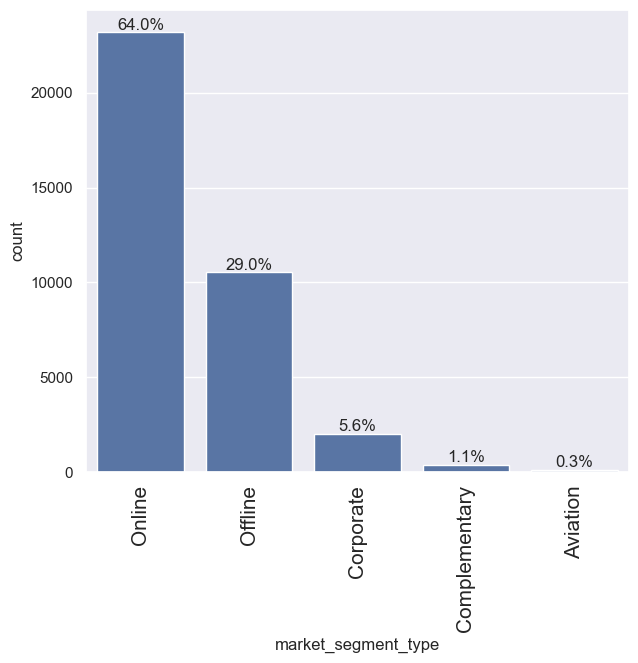

In [48]:
labeled_barplot(innData, "market_segment_type", perc=True)

- Most of the guests are coming from `Online` market segment, which is about 64%

**3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

Lets put market segments on x axis and avg_price_per_room on y axis to see the data distribution and plot a barplot. Also, based on univariate analysis for avg_price_per_room data was almost distrubiuted normally where mean and median were almost equal with a very minimal differences, so it will be safe to take the average

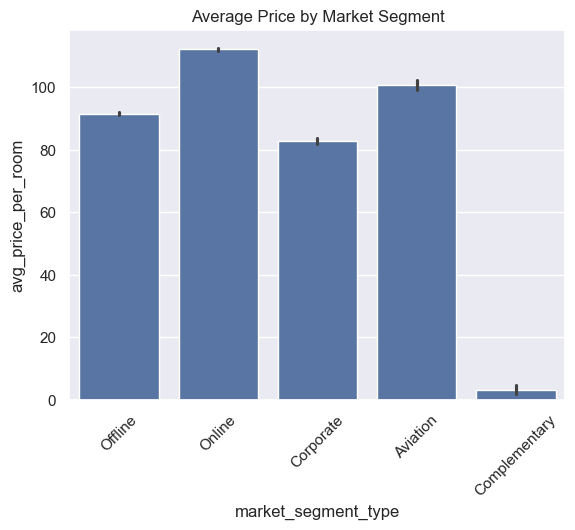

In [49]:
sns.barplot(x='market_segment_type', y='avg_price_per_room', data=innData, estimator=np.mean)
plt.title('Average Price by Market Segment')
plt.xticks(rotation=45)
plt.show()

- It seems room prices are higher at about 10% between offline and online market segement
- Corporate segment is able to get the better prices
- Aviation segment is almost at par with offline segment

**4. What percentage of bookings are canceled?**

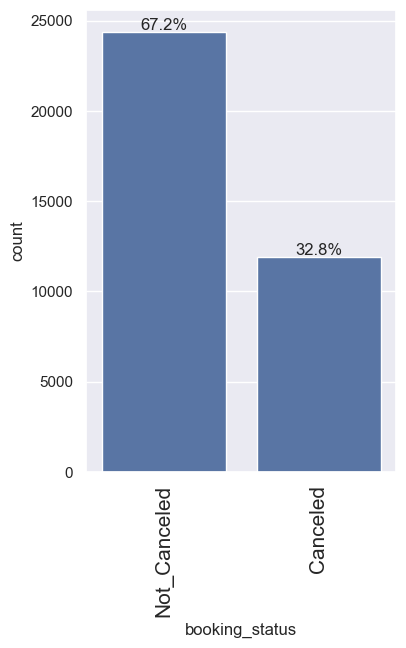

In [50]:
labeled_barplot(innData, "booking_status", perc=True)

- About 33% bookings are cancelled

**5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**
- `repeated_guest` : Is the customer a repeated guest? (0 - No, 1- Yes)
- `booking_status` : Flag indicating if the booking was canceled or not.

In [51]:
# Total repeated guests
total_repeated_guests = innData[innData['repeated_guest'] == 1]

# Number of those who canceled
repeated_guests_canceled = total_repeated_guests[total_repeated_guests['booking_status'] == 'Canceled']

# Calculate percentage
cancel_percentage = (len(repeated_guests_canceled) / len(total_repeated_guests)) * 100
print(f"Percentage of repeating guests who canceled: {cancel_percentage:.2f}%")

Percentage of repeating guests who canceled: 1.72%


**6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

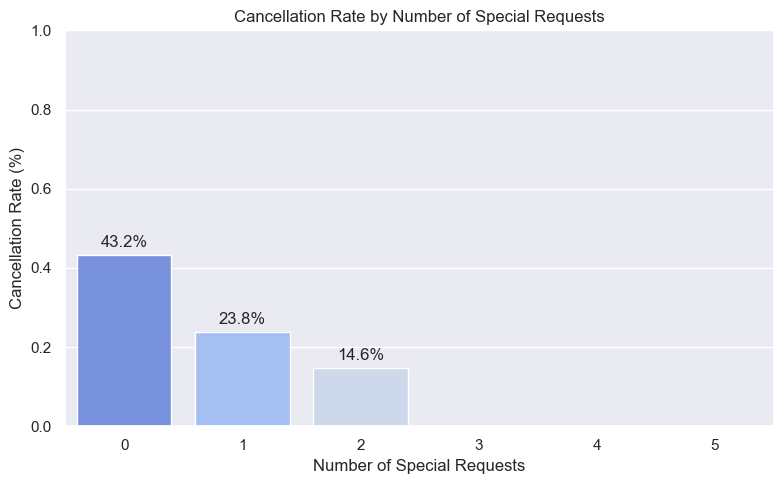

In [52]:
# To get to answer this query, it require little bit coding to visualize the special requirements relations to booking cancellation. 

# Filter canceled bookings only
canceled_data = innData[innData['booking_status'] == 'Canceled']

# Count total and canceled bookings per special request count
total_counts = innData['no_of_special_requests'].value_counts().sort_index()
canceled_counts = canceled_data['no_of_special_requests'].value_counts().sort_index()

# Calculate cancellation rate
cancellation_rates = (canceled_counts / total_counts).reset_index()
cancellation_rates.columns = ['no_of_special_requests', 'cancellation_rate']

plt.figure(figsize=(8, 5))
sns.barplot(
    x='no_of_special_requests',
    y='cancellation_rate',
    data=cancellation_rates,
    palette='coolwarm'
)

plt.title('Cancellation Rate by Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Cancellation Rate (%)')
plt.ylim(0, 1)  

# Annotate bars with percentage labels
for index, row in cancellation_rates.iterrows():
    x = row['no_of_special_requests']
    y = row['cancellation_rate']
    # print(f"x: {x}, y: {y}")  this is where nan is happening so, i needed to condition it
    if pd.notnull(x) and pd.notnull(y) and np.isfinite(x) and np.isfinite(y):
        plt.text(
            x=index,
            y=y + 0.02,
            s=f"{y * 100:.1f}%",
            ha='center'
        )

plt.tight_layout()
plt.show()

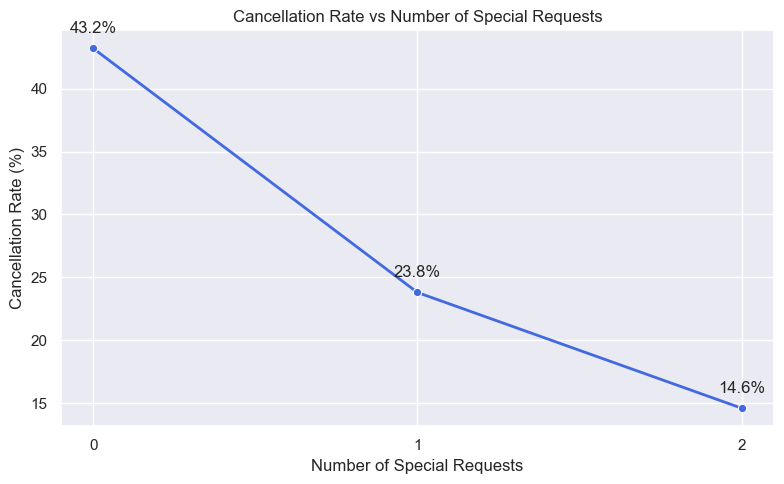

In [53]:
# This is one step up to visualize the correlation or causation 
# Create the data
cancellation_data = {
    'no_of_special_requests': [0, 1, 2],
    'cancellation_rate': [43.2, 23.8, 14.6]
}

df_cancellation = pd.DataFrame(cancellation_data)

# Plotting the line chart
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=df_cancellation,
    x='no_of_special_requests',
    y='cancellation_rate',
    marker='o',
    linewidth=2,
    color='royalblue'
)

# Add percentage annotations
for i in range(df_cancellation.shape[0]):
    plt.text(
        df_cancellation['no_of_special_requests'][i],
        df_cancellation['cancellation_rate'][i] + 1,
        f"{df_cancellation['cancellation_rate'][i]}%",
        ha='center',
        va='bottom'
    )

# Styling
plt.title("Cancellation Rate vs Number of Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Cancellation Rate (%)")
plt.xticks(df_cancellation['no_of_special_requests'])
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation** 

Guests with `more special requests` are `less likely` `to cancel`.

This may indicate that such guests are more `committed` to their stay. However, `this is just a correlation` — `it doesn't prove that special requests cause lower cancellations.`

Hope my analysis is correct

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing value treatment (if needed)**

In [54]:
# check missing values if any
innData.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- There are no missing value in the data, so thats a good news :) 

**Feature engineering (if needed)**

**MY Findings**

Following feature variables (including the y predict) are defined as string `Object`. `Booking_ID ` , `type_of_meal_plan`, `room_type_reserved`, `market_segment_type` and `booking_status`. 

Lets fix this in few steps.

1. Drop Booking_ID 
2. Change dtype for `booking_status`from string Object to Categeroy.
3. For booking_status - encode the values as `"Canceled" : 1`, `"Not_Canceled" : 0`

In [55]:
innData_filled = innData.copy()
innData_filled.drop("Booking_ID", axis=1, inplace=True)

In [56]:
# for booking_status - change the values as "Canceled" : 1, "Not_Canceled" : 0
replaceStatus = {"booking_status" : {"Canceled" : 1, "Not_Canceled" : 0 } }
if innData_filled["booking_status"].dtype == 'object':
        innData_filled["booking_status"] = pd.Categorical(innData_filled["booking_status"])
innData_filled = innData_filled.replace(replaceStatus)

In [57]:
innData_filled.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0              0  
1                       1              0  
2                       0              1  
3                       0              1  
4                       0              1

**Outlier detection and treatment (if needed)**

- In my opinion and the analysis being done above, i feel `avg_price_per_room` has lots of outliers. 

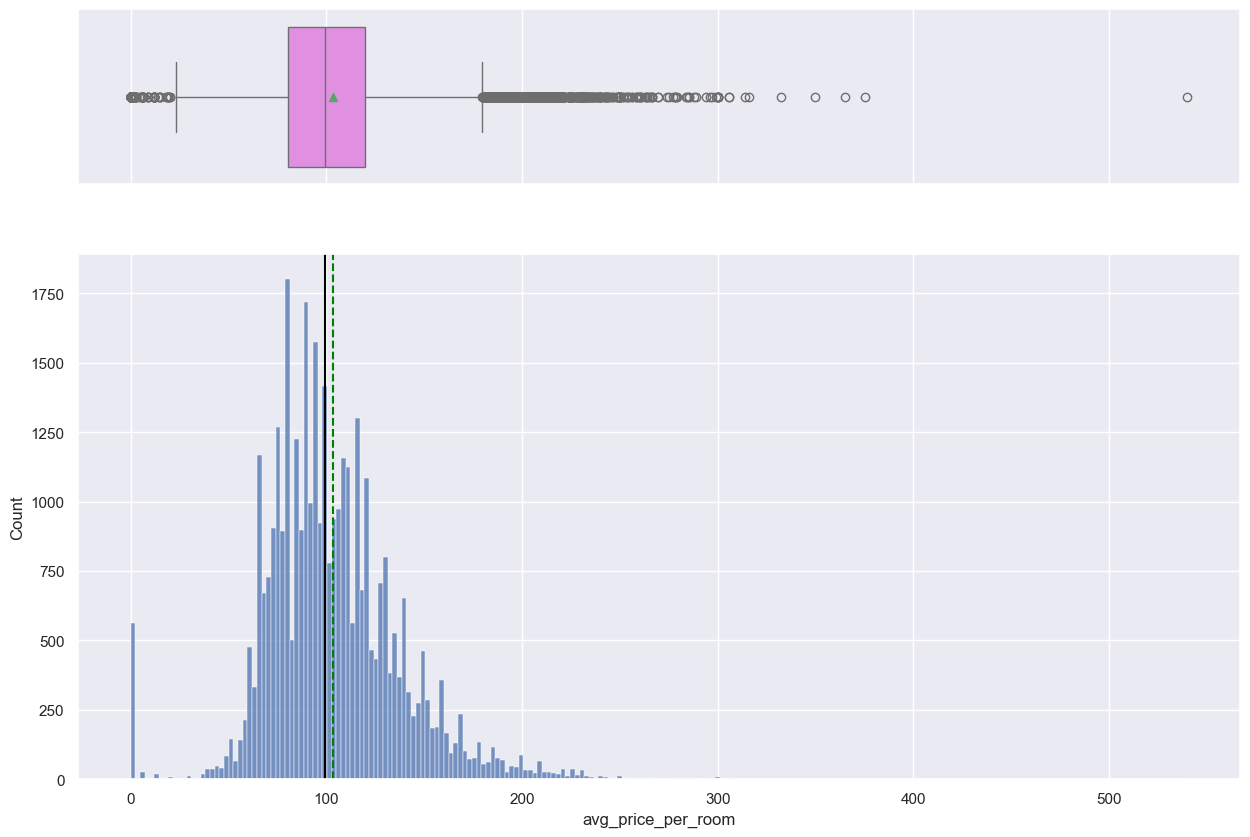

In [58]:
histogram_boxplot(innData_filled, "avg_price_per_room")

- `avg_price_per_room` has many outliers. It might be a good idea to remove the outliers from this feature variable as this is an important independent variable which will help predicting the model.

In [59]:
# Calculate Q1, Q3, and IQR for 'avg_price_per_room'
Q1 = innData_filled["avg_price_per_room"].quantile(0.25)
Q3 = innData_filled["avg_price_per_room"].quantile(0.75)
IQR = Q3 - Q1
# Calculating value of upper whisker
upper_whisker = Q3 + 1.5 * IQR
# avg_price_per_room - assigning the outliers the value of upper_whisker
innData_filled.loc[innData_filled["avg_price_per_room"] >= 500, "avg_price_per_room"] = upper_whisker

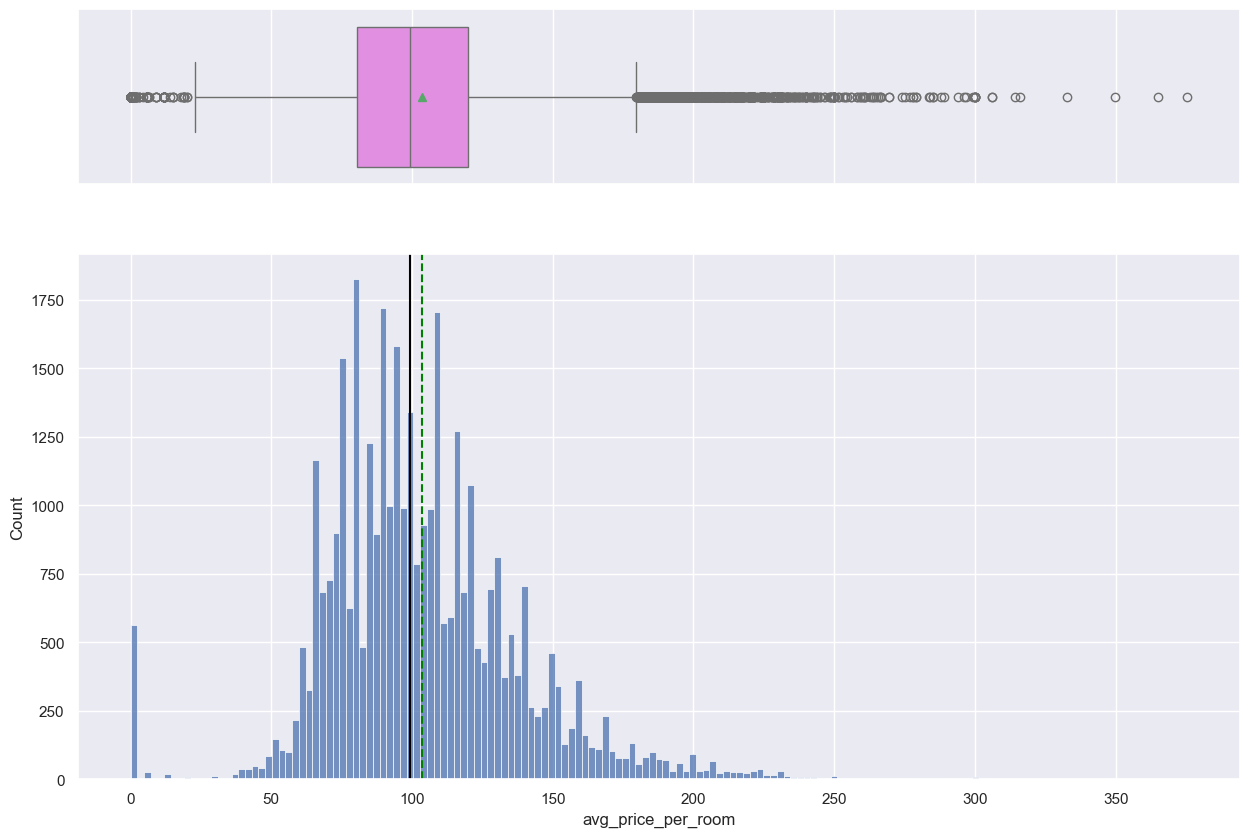

In [60]:
histogram_boxplot(innData_filled, "avg_price_per_room")

- Outliers are removed and its evident based on the histogram shown above

**Preparing data for modeling**

- Handle the string Object `type_of_meal_plan`, `room_type_reserved` and `market_segment_type`using panda `one hot encoding`
- Split the data into train and test to be able to evaluate the model that we build on the train data
- Based on the business problem, we need to predict '`booking_status`', so this can be set to y.
- All other variables or aka `features` can be set to X

In [61]:
# create a final copy of innData_filled. that way, we don't jeopradize the dataset
innData_final = innData_filled.copy()

In [62]:
innData_final.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0              0  
1                       1              0  
2                       0              1  
3                       0              1  
4                       0              1

In [63]:
# Creating X features to predict y variables
X = innData_final.drop(["booking_status"], axis=1)
y = innData_final["booking_status"]

In [64]:
print(X.head())

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

In [65]:
print(y.head())

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: category
Categories (2, int64): [1, 0]


In [66]:
# let's add the intercept to data
X = sm.add_constant(X)

In [67]:
# Check X dtypes
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36275 non-null  float64
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [68]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

In [69]:
X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0             2               0                     1   
1    1.0             2               0                     2   
2    1.0             1               0                     2   
3    1.0             2               0                     0   
4    1.0             2               0                     1   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                  2                           0        224          2017   
1                  3                           0          5          2018   
2                  1                           0          1          2018   
3                  2                           0        211          2018   
4                  1                           0         48          2018   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0             10             2               0                             0   
1             11             6               0                             0   
2              2            28               0                             0   
3              5            20               0                             0   
4              4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                          False   
1                       1                          False   
2                       0                          False   
3                       0                          False   
4                       0                          False   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                          False                           False   
1                          False                            True   
2                          False                           False   
3                          False                           False   
4                          False                            True   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                              False                          False   
1                              False                          False   
2                              False                          False

In [70]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
0    1.0           2.0             0.0                   1.0   
1    1.0           2.0             0.0                   2.0   
2    1.0           1.0             0.0                   2.0   
3    1.0           2.0             0.0                   0.0   
4    1.0           2.0             0.0                   1.0   

   no_of_week_nights  required_car_parking_space  lead_time  arrival_year  \
0                2.0                         0.0      224.0        2017.0   
1                3.0                         0.0        5.0        2018.0   
2                1.0                         0.0        1.0        2018.0   
3                2.0                         0.0      211.0        2018.0   
4                1.0                         0.0       48.0        2018.0   

   arrival_month  arrival_date  repeated_guest  no_of_previous_cancellations  \
0           10.0           2.0             0.0                           0.0   
1           11.0           6.0             0.0                           0.0   
2            2.0          28.0             0.0                           0.0   
3            5.0          20.0             0.0                           0.0   
4            4.0          11.0             0.0                           0.0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                   0.0               65.00   
1                                   0.0              106.68   
2                                   0.0               60.00   
3                                   0.0              100.00   
4                                   0.0               94.50   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                     0.0                            0.0   
1                     1.0                            0.0   
2                     0.0                            0.0   
3                     0.0                            0.0   
4                     0.0                            0.0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                            0.0                             0.0   
1                            0.0                             1.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             1.0   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0

## EDA

- It is a good idea to explore the data once again after manipulating it.

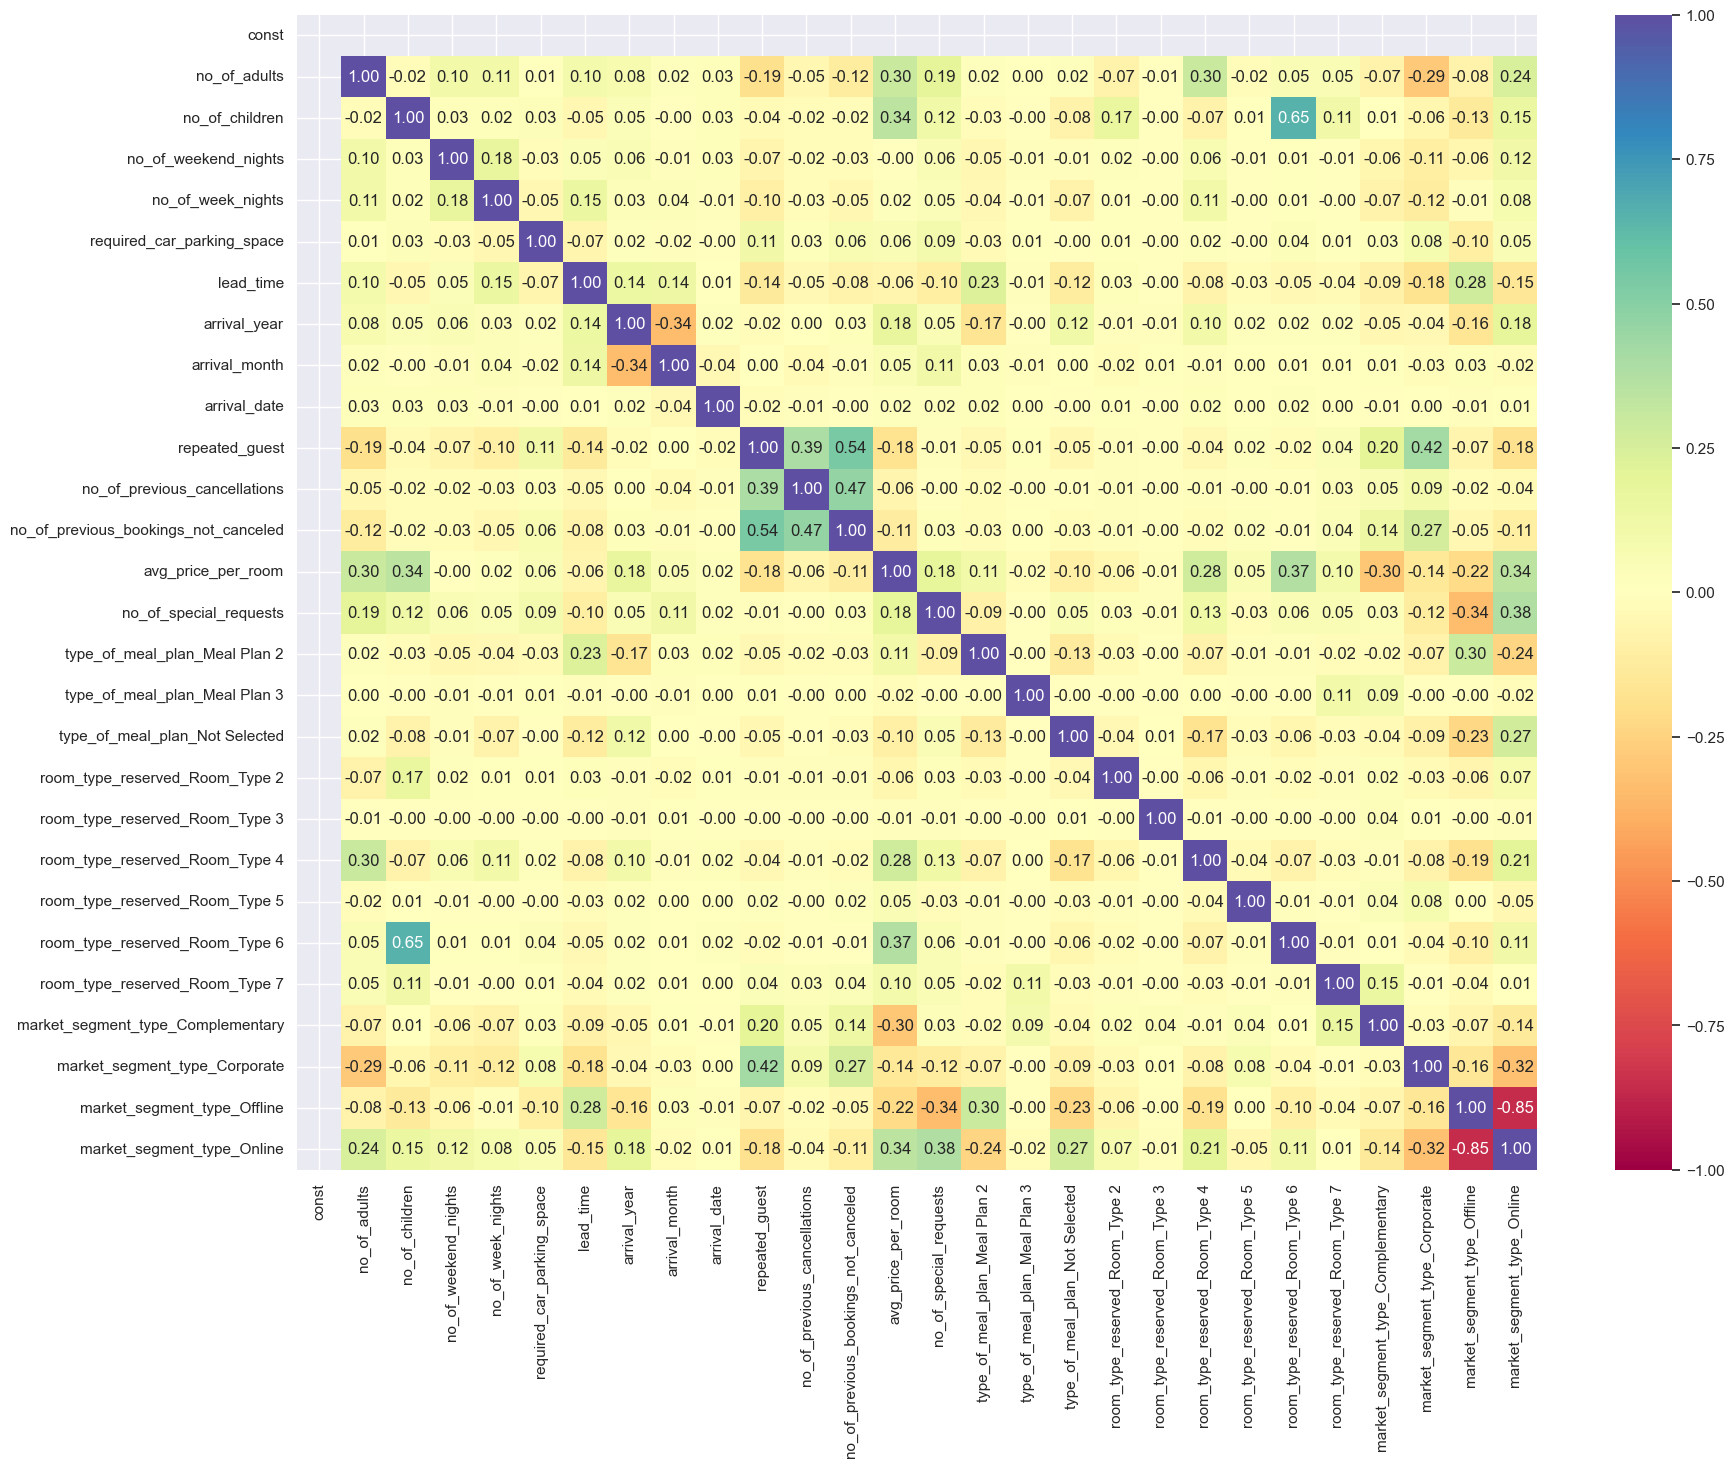

In [71]:
# create heatmap to understand correlation strength between all the X variables 
num_cols = X.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 15))
ax = sns.heatmap(X[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- No linear relationship between the independent variables and its expected. This is a classification problem and is a sigmoid function.

## Building a Logistic Regression model

In [72]:
# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [73]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print("Number of rows in train data =", y_train.shape[0])
print("Number of rows in test data =", y_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883
Number of rows in train data = 25392
Number of rows in test data = 10883


In [74]:
# fitting logistic regression model in the training dataset X
logit_model = sm.Logit(y_train, X_train.astype(float)) # instantiate the logistic regression model
logit_result = logit_model.fit(disp=False) # fit the logit model
print(logit_result.summary()) # print summary

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.3292
Time:                        22:34:44   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.1330    120.816     -7.649      0.000   -1160.928    -687.338
no_of_adults                             0.1136      

**Observations**

- Negative values of the coefficient show that the probability of a `booking cancellation` decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of a `booking cancellation` increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

## Model performance evaluation

- Here, the key aspect to consider is that, it is difficult to predict customer behavour. Model we build may not predict the behaviour accurately in  a way like : 
  - Model may predict that customer will `not` to cancel the booking, but in reality they may. Lead to False Negative scenarios
  - Model may predict that customer `will` cancel the booking, but in reality they may 'not' --> lead to False Positive scenarios
- So, I think, we should try to consider the metrics which would actually minimize the false positve and false negative scenarios

- We should focus on evaluation metrics (like Precision, Recall, and F1-score) that help us understand and manage false positives and false negatives, instead of just overall accuracy of a model which may mislead the overall perspective.

    - `Precision` helps us understand how many of the positive predictions were actually correct (minimizes False Positives).
    - `Recall` tells us how many of the actual positives the model was able to correctly identify (minimizes False Negatives).
    - `F1-score` balances both Precision and Recall, and is especially useful when we care about both types of errors

In [75]:
# Lets create method to calculare model performancce
# Precision, Recall and F1-score
# Threshold is by default set to 0.5 (50%)
def model_performance_metrics(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
    return df_perf

In [76]:
def calculate_confusion_matrix(model, predictors, target, threshold=0.5):
    
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)

    # Labels: TN, FP, FN, TP with count and % format
    labels = np.asarray(
        [
            ["True Negative\n{0}\n{1:.2%}".format(cm[0, 0], cm[0, 0] / cm.sum()),
             "False Positive\n{0}\n{1:.2%}".format(cm[0, 1], cm[0, 1] / cm.sum())],
            ["False Negative\n{0}\n{1:.2%}".format(cm[1, 0], cm[1, 0] / cm.sum()),
             "True Positive\n{0}\n{1:.2%}".format(cm[1, 1], cm[1, 1] / cm.sum())]
        ]
    )

    # Plot
    fig, ax = plt.subplots(figsize=(6, 4))
    for i in range(2):
        for j in range(2):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=2))
            ax.text(j + 0.5, i + 0.5, labels[i, j],
                    ha="center", va="center", fontsize=12, color="black")

    # Add outer border around entire matrix
    ax.add_patch(plt.Rectangle((0, 0), 2, 2, fill=False, edgecolor='black', lw=3))

    # Axes formatting
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(["Pred: 0", "Pred: 1"])
    ax.set_yticks([0.5, 1.5])
    ax.set_yticklabels(["True: 0", "True: 1"])
    ax.invert_yaxis()
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_title("Confusion Matrix", fontsize=14)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

In [77]:
print("Training performance:")
model_performance_metrics(logit_result , X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.805963  0.634103   0.739609  0.682804

**Observations**

- Accuracy of the base model is 80% which is not bad.
- The f1_score of the model is ~0.68 and we will try to maximize it further - that means, we need to maximize the recall and precison to minimize the false positive and false negatives scenarios (based on the evaluation criteria set above)
- The variables used to build the model might contain multicollinearity, which will affect the p-values
- We will have to remove multicollinearity from the data to get reliable coefficients and p-values

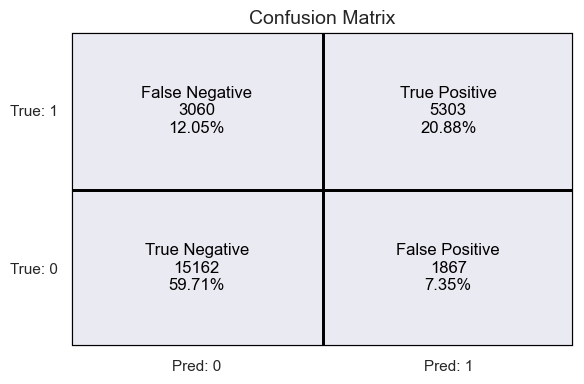

In [78]:
calculate_confusion_matrix(logit_result, X_train, y_train)

**Observations**

- `True Positive ~21%` and `True Negative is ~58%` - our goal would be to `maximize` this to have a valuable predictive model
- `False Negative ~12%` and `False Positive is ~7%` - our goal would be to `minimize` this to increase the value of predictive model and bring accuracy

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

**`VIF` - Variance  Inflation  factor**

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the `current` predictor and the remaining predictor variables
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [79]:
# let's check the VIF of the X_train (features)

vif_values = []  # List to store VIF values
columns = X_train.columns  # Get column names

# Compute VIF for each feature
for i in range(len(columns)):
    vif = variance_inflation_factor(X_train.values, i)
    vif_values.append(vif)

# Create a Pandas Series with column names as index
vif_x_train = pd.Series(vif_values, index=columns)
# print vif
print(vif_x_train)

const                                   3.949119e+07
no_of_adults                            1.348486e+00
no_of_children                          1.978622e+00
no_of_weekend_nights                    1.069487e+00
no_of_week_nights                       1.095670e+00
required_car_parking_space              1.039977e+00
lead_time                               1.395178e+00
arrival_year                            1.431668e+00
arrival_month                           1.276373e+00
arrival_date                            1.006735e+00
repeated_guest                          1.783612e+00
no_of_previous_cancellations            1.395688e+00
no_of_previous_bookings_not_canceled    1.651996e+00
avg_price_per_room                      2.064208e+00
no_of_special_requests                  1.247302e+00
type_of_meal_plan_Meal Plan 2           1.273250e+00
type_of_meal_plan_Meal Plan 3           1.025217e+00
type_of_meal_plan_Not Selected          1.272519e+00
room_type_reserved_Room_Type 2          1.1015

**Observation**
VIF is within the range, less than 10, so it seems X_train data have `No HIGH` multicollinearity

**Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.**

In [80]:
print(logit_result.summary()) # print summary

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.3292
Time:                        22:34:47   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -924.1330    120.816     -7.649      0.000   -1160.928    -687.338
no_of_adults                             0.1136      

**As observed in the above model (logit_result): Following features have p-value greater than 0.05, so, we can drop it because it is not significant in predicting 'booking_status'**
- `market_segment_type_Complementary`  
- `room_type_reserved_Room_Type 3`  
- `type_of_meal_plan_Meal Plan 3` 
- `arrival_date`  
- `no_of_previous_bookings_not_canceled`  
- `market_segment_type_Online`  

However, we need to do this one by one and check all the metrics (accuracy, precision, recall and F1)

Remove `market_segment_type_Complementary` since it has the highest p value (1.000) and recalculate metrics

In [81]:
X_train_1 = X_train.drop(["market_segment_type_Complementary"], axis=1)
logit_model_1 = sm.Logit(y_train, X_train_1.astype(float)) # instantiate the logistic regression model
logit_result_1 = logit_model_1.fit(disp=False) # fit the logit model
print(logit_result_1.summary()) # print summary

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.3284
Time:                        22:34:48   Log-Likelihood:                -10808.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.9438    120.608     -7.661      0.000   -1160.332    -687.556
no_of_adults                             0.1066      

In [82]:
print("Training performance before removing : market_segment_type_Complementary")
model_performance_metrics(logit_result , X_train, y_train)

Training performance before removing : market_segment_type_Complementary


Accuracy    Recall  Precision        F1
0  0.805963  0.634103   0.739609  0.682804

In [83]:
print("Training performance after removing : market_segment_type_Complementary")
model_performance_metrics(logit_result_1 , X_train_1, y_train)

Training performance after removing : market_segment_type_Complementary


Accuracy    Recall  Precision        F1
0  0.805411  0.632668   0.738966  0.681698

**Observation** - It seems overall metrices came down slightly but I don't think that matters because p value for market_segment_type_Complementary was 1 and this shows that this variable did not have much predictive power

`room_type_reserved_Room_Type 3` - Remove since it has the highest p value (0.941) and recalculate metrics

In [84]:
X_train_2 = X_train_1.drop(["room_type_reserved_Room_Type 3"], axis=1)
logit_model_2 = sm.Logit(y_train, X_train_2.astype(float)) # instantiate the logistic regression model
logit_result_2 = logit_model_2.fit(disp=False) # fit the logit model

In [85]:
print("Training performance before removing : room_type_reserved_Room_Type 3")
model_performance_metrics(logit_result_1 , X_train_1, y_train)

Training performance before removing : room_type_reserved_Room_Type 3


Accuracy    Recall  Precision        F1
0  0.805411  0.632668   0.738966  0.681698

In [86]:
print("Training performance after removing : room_type_reserved_Room_Type 3")
model_performance_metrics(logit_result_2 , X_train_2, y_train)

Training performance after removing : room_type_reserved_Room_Type 3


Accuracy    Recall  Precision        F1
0  0.805411  0.632668   0.738966  0.681698

**Observation** - It seems overall no change in the metrics and this shows that this variable did not have much predictive power

In [87]:
print(logit_result_2.summary()) # print summary

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.3284
Time:                        22:34:50   Log-Likelihood:                -10808.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.9212    120.608     -7.661      0.000   -1160.308    -687.534
no_of_adults                             0.1066      

`arrival_date` - Remove since it has the highest p value (0.830) and recalculate metrics

In [88]:
X_train_3 = X_train_2.drop(["arrival_date"], axis=1)
logit_model_3 = sm.Logit(y_train, X_train_3.astype(float)) # instantiate the logistic regression model
logit_result_3 = logit_model_3.fit(disp=False) # fit the logit model

In [89]:
print("Training performance before removing : arrival_date")
model_performance_metrics(logit_result_2 , X_train_2, y_train)

Training performance before removing : arrival_date


Accuracy    Recall  Precision        F1
0  0.805411  0.632668   0.738966  0.681698

In [90]:
print("Training performance after removing : arrival_date")
model_performance_metrics(logit_result_3 , X_train_3, y_train)

Training performance after removing : arrival_date


Accuracy    Recall  Precision        F1
0  0.805451  0.632787   0.739003  0.681783

**Observation** - It seems very slight positive change in the metrics F1, Recall and Precision. This shows that this variable did not have much predictive power

In [91]:
print(logit_result_3.summary()) # print summary

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.3284
Time:                        22:34:51   Log-Likelihood:                -10808.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.8919    120.612     -7.660      0.000   -1160.286    -687.497
no_of_adults                             0.1068      

`market_segment_type_Online` - Remove since it has the highest p value (0.639) and recalculate metrics

In [92]:
X_train_4 = X_train_3.drop(["market_segment_type_Online"], axis=1)
logit_model_4 = sm.Logit(y_train, X_train_4.astype(float)) # instantiate the logistic regression model
logit_result_4 = logit_model_4.fit(disp=False) # fit the logit model

In [93]:
print("Training performance before removing : market_segment_type_Online")
model_performance_metrics(logit_result_3 , X_train_3, y_train)

Training performance before removing : market_segment_type_Online


Accuracy    Recall  Precision        F1
0  0.805451  0.632787   0.739003  0.681783

In [94]:
print("Training performance after removing : market_segment_type_Online")
model_performance_metrics(logit_result_4 , X_train_4, y_train)

Training performance after removing : market_segment_type_Online


Accuracy    Recall  Precision        F1
0  0.805411  0.632548   0.739033  0.681657

**Observation** - It seems very slight change in the metrics F1, Recall and Precision. This shows that this variable did not have much predictive power

In [95]:
print(logit_result_4.summary()) # print summary

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.3284
Time:                        22:34:53   Log-Likelihood:                -10808.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -921.1559    120.475     -7.646      0.000   -1157.282    -685.030
no_of_adults                             0.1088      

`no_of_previous_bookings_not_canceled` - Remove since it has the highest p value (0.257) and recalculate metrics

In [96]:
X_train_5 = X_train_4.drop(["no_of_previous_bookings_not_canceled"], axis=1)
logit_model_5 = sm.Logit(y_train, X_train_5.astype(float)) # instantiate the logistic regression model
logit_result_5 = logit_model_5.fit(disp=False) # fit the logit model

In [97]:
print("Training performance before removing : no_of_previous_bookings_not_canceled")
model_performance_metrics(logit_result_4 , X_train_4, y_train)

Training performance before removing : no_of_previous_bookings_not_canceled


Accuracy    Recall  Precision        F1
0  0.805411  0.632548   0.739033  0.681657

In [98]:
print("Training performance after removing : no_of_previous_bookings_not_canceled")
model_performance_metrics(logit_result_5 , X_train_5, y_train)

Training performance after removing : no_of_previous_bookings_not_canceled


Accuracy    Recall  Precision        F1
0  0.805411  0.632548   0.739033  0.681657

**Observation** - It seems no change in the metrics F1, Recall and Precision. This shows that this variable did not have much predictive power

In [99]:
print(logit_result_5.summary()) # print summary

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.3283
Time:                        22:34:55   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -919.5452    120.487     -7.632      0.000   -1155.694    -683.396
no_of_adults                       0.1087      0.037      2.916      0.

`type_of_meal_plan_Meal Plan 3`  - Remove since it has the highest p value (0.214) and recalculate metrics

In [100]:
X_train_6 = X_train_5.drop(["type_of_meal_plan_Meal Plan 3"], axis=1)
logit_model_6 = sm.Logit(y_train, X_train_6.astype(float)) # instantiate the logistic regression model
logit_result_6 = logit_model_6.fit(disp=False) # fit the logit model

In [101]:
print("Training performance before removing : type_of_meal_plan_Meal Plan 3")
model_performance_metrics(logit_result_5 , X_train_5, y_train)

Training performance before removing : type_of_meal_plan_Meal Plan 3


Accuracy    Recall  Precision        F1
0  0.805411  0.632548   0.739033  0.681657

In [102]:
print("Training performance after removing : type_of_meal_plan_Meal Plan 3")
model_performance_metrics(logit_result_6 , X_train_6, y_train)

Training performance after removing : type_of_meal_plan_Meal Plan 3


Accuracy    Recall  Precision        F1
0  0.805372  0.632429   0.738997  0.681572

**Observation** - It seems slight change in the metrics F1, Recall and Precision. This shows that this variable did not have much predictive power

In [103]:
print(logit_result_6.summary()) # print summary

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.3282
Time:                        22:34:57   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.8647    120.456     -7.612      0.000   -1152.953    -680.776
no_of_adults                       0.1087      0.037      2.916      0.

**Observation**

- Its seems now, all the P values are within the thresold value 0.05. That means, all the features (a.k.a x independent variables) have predictive power and will be useful in building up the model.
- The final model is `X_train_6` where
     - there are no significant collinerarity among the independent variable
     - all independent variables have predictive power.
       
**Lets evaluate the `performance matrices` and `confusion matrix` and see if there is any change in that with respect to `original model - 'X_train'` and `optimized 'X_train_6'`**

X_train - Original


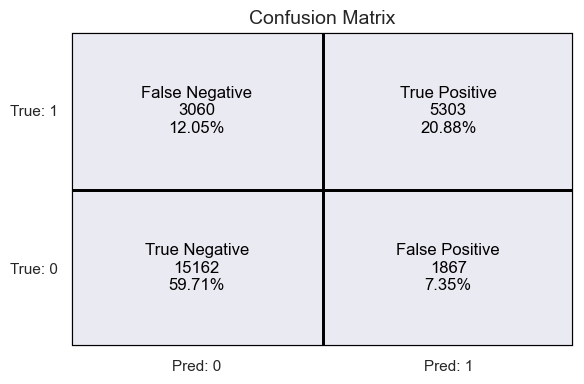

In [104]:
print("X_train - Original")
calculate_confusion_matrix(logit_result, X_train, y_train)

X_train_6 - Optimized


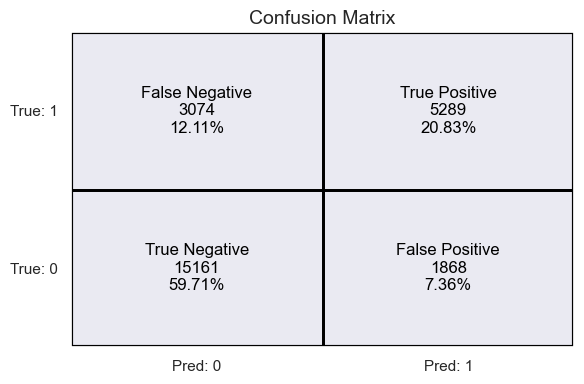

In [105]:
print("X_train_6 - Optimized")
calculate_confusion_matrix(logit_result_6, X_train_6, y_train)

**Observation**

- Slight change in the matrix but its still optimized. Real test would be test the model arainsts the test data.

In [106]:
print("Training performance before optimizng X_train dataset")
model_performance_metrics(logit_result , X_train, y_train)

Training performance before optimizng X_train dataset


Accuracy    Recall  Precision        F1
0  0.805963  0.634103   0.739609  0.682804

In [107]:
print("Training performance after optimiziation aka X_train_6")
model_performance_metrics(logit_result_6 , X_train_6, y_train)

Training performance after optimiziation aka X_train_6


Accuracy    Recall  Precision        F1
0  0.805372  0.632429   0.738997  0.681572

**Observation**

- Slight change in the performance matrices but its still optimized. Real test would be test the model arainsts the test data.

Now we have handled 

- `Multicollinearity` and `p values`, and have the `baseline` train dataset as `X_train_6`.
- `Baseline` for `performance metrics` set as well on `X_train_6` and `y_train`.
- `Baseline` `logit_model` is `logit_result_6`

**Next Step**

1. Synchronize `X_train_6` and `X_test` dataset.
2. Capture the performance matrix on test dataset - this is to set the baseline for the `test` dataset.
3. Plot ROC, AUC to visualize on both - training dataset and test dataset (unseen).
4. Try out different threshold and see if it improves the performance metrics on the training set.
5. 'End Goal` - idea would be to minimize the false positive and false negative cases and improve the true positive and true negative scenarios
6. The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
   * Therefore, **odds =  exp(b)**
   * The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**1. Synchronize `X_train_6` and `X_test` dataset.**

In [108]:
X_train_6.columns

Index(['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'repeated_guest',
       'no_of_previous_cancellations', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Corporate', 'market_segment_type_Offline'],
      dtype='object')

In [109]:
X_test.columns

Index(['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

**We need to remove these columns from `X_test` dataset**
- `arrival_date`
- `no_of_previous_bookings_not_canceled`
- `type_of_meal_plan_Meal Plan 3`
- `room_type_reserved_Room_Type 3`
- `market_segment_type_Complementary`
- `market_segment_type_Online`

In [110]:
# drop columns from the test dataset that are not there in the training dataset
X_test_1 = X_test.drop(
    ["arrival_date", "no_of_previous_bookings_not_canceled", "type_of_meal_plan_Meal Plan 3", "room_type_reserved_Room_Type 3", "market_segment_type_Complementary", "market_segment_type_Online"], axis=1
)

**SANITY CHECK**

In [111]:
X_test_1.columns

Index(['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'repeated_guest',
       'no_of_previous_cancellations', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Corporate', 'market_segment_type_Offline'],
      dtype='object')

In [112]:
X_train_6.columns

Index(['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'repeated_guest',
       'no_of_previous_cancellations', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'market_segment_type_Corporate', 'market_segment_type_Offline'],
      dtype='object')

In [113]:
# check for equality of X_train_6 and X_test_1 dataset.
for i, (a, b) in enumerate(zip(X_train_6, X_test_1)):
    if a != b:
        print(f"Mismatch at position {i}: '{a}' vs '{b}'")
print("X_train_6 and X_test_1 dataset MATCH")

X_train_6 and X_test_1 dataset MATCH


**2. Capture the performance matrix on test dataset - this is to set the baseline for the test dataset.**

In [114]:
def print_model_comparison(
    model, X_train, y_train, X_test, y_test, threshold=0.5
):
    """
    Print comparison table of model performance metrics for training and test datasets based on the threshold set (by default - 0.5)
    """

    # Generate predictions (probabilities)
    y_train_proba = model.predict(X_train)
    y_test_proba = model.predict(X_test)

    train_perf = model_performance_metrics(model, X_train, y_train, threshold)
    test_perf = model_performance_metrics(model, X_test, y_test, threshold)

    # Calculate ROC AUC and add to DataFrame
    train_perf['ROC AUC'] = roc_auc_score(y_train, y_train_proba)
    test_perf['ROC AUC'] = roc_auc_score(y_test, y_test_proba)

    # Rename index for clarity
    train_perf.index = ['Train']
    test_perf.index = ['Test']

    # Combine into a single DataFrame
    comparison_df = pd.concat([train_perf, test_perf])

    print("\nModel Performance Comparison:")
    display(comparison_df.round(6))  


In [115]:
# default threshold is 0.5 a.k.a 50%
print_model_comparison(logit_result_6, X_train_6, y_train, X_test_1, y_test)


Model Performance Comparison:


Accuracy    Recall  Precision        F1   ROC AUC
Train  0.805372  0.632429   0.738997  0.681572  0.862635
Test   0.804649  0.630892   0.729003  0.676408  0.863706

**Observation**

- Both Train and Test metrics are almost showing the same results. This indicate that my model is neither underfitting nor overfitting. 
- ROC AUC for training dataset (X_train_6) is able to classify separation well
- ROC AUC for test dataset (y_test) is almost similar to train dataset (X_train_6) - seems like logit model is generalizing well on the unseen dataset 

**3. Plot ROC, AUC to visualize X_train_6 dataset**

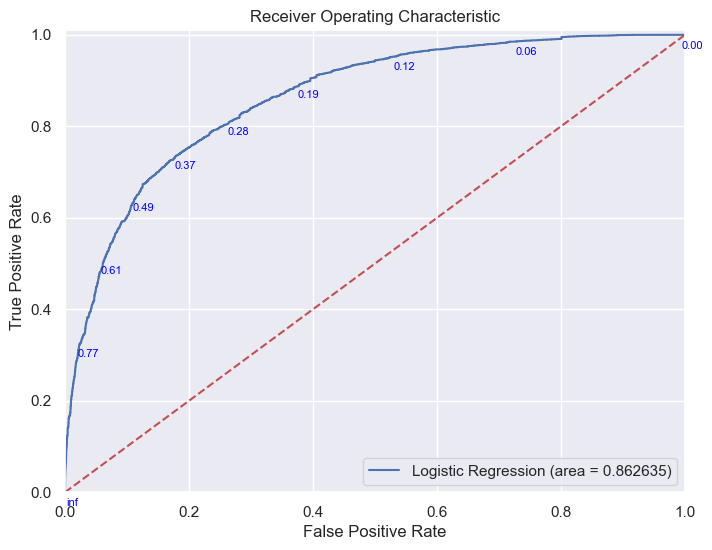

In [116]:
# extract roc_auc_score for X_train_6 and y_train dataset
# Compute ROC AUC and ROC data
logit_roc_auc_X_train_6 = roc_auc_score(y_train, logit_result_6.predict(X_train_6))
fpr, tpr, thresholds = roc_curve(y_train, logit_result_6.predict(X_train_6))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.6f)" % logit_roc_auc_X_train_6)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

# Annotate thresholds on the curve at regular intervals
for i in np.linspace(0, len(thresholds) - 1, 10, dtype=int):
    plt.annotate(f'{thresholds[i]:.2f}',
                 (fpr[i], tpr[i]),
                 textcoords="offset points",
                 xytext=(5, -10),
                 ha='center',
                 fontsize=8,
                 color='blue')

plt.show()

**3. Plot ROC, AUC to visualize X_test_1 `unseen`dataset**

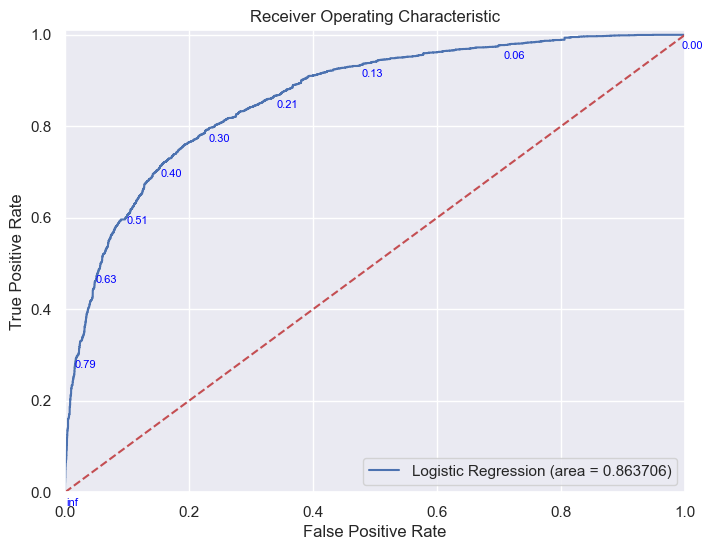

In [117]:
# extract roc_auc_score for X_train_6 and y_train dataset
# Compute ROC AUC and ROC data
logit_roc_auc_X_test_1 = roc_auc_score(y_test, logit_result_6.predict(X_test_1))
fpr, tpr, thresholds = roc_curve(y_test, logit_result_6.predict(X_test_1))

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.6f)" % logit_roc_auc_X_test_1)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

# Annotate thresholds on the curve at regular intervals
for i in np.linspace(0, len(thresholds) - 1, 10, dtype=int):
    plt.annotate(f'{thresholds[i]:.2f}',
                 (fpr[i], tpr[i]),
                 textcoords="offset points",
                 xytext=(5, -10),
                 ha='center',
                 fontsize=8,
                 color='blue')

plt.show()

**Observation**

Similar ROC and AUC. Lets find out if there are any possibilities to improve the metrics -  Recall, Precision, F1, AUC

**4. Try out different threshold and see if it improves the performance metrics on the training set.**

**Default threshold to 0.50**

In [118]:
# default threshold is 0.5 a.k.a 50%
print_model_comparison(logit_result_6, X_train_6, y_train, X_test_1, y_test)


Model Performance Comparison:


Accuracy    Recall  Precision        F1   ROC AUC
Train  0.805372  0.632429   0.738997  0.681572  0.862635
Test   0.804649  0.630892   0.729003  0.676408  0.863706

**Set threshold to 0.45**

In [119]:
# threshold is 0.45 a.k.a 45%
print_model_comparison(logit_result_6, X_train_6, y_train, X_test_1, y_test,threshold=0.45)


Model Performance Comparison:


Accuracy    Recall  Precision        F1   ROC AUC
Train  0.805844  0.679302   0.716484  0.697397  0.862635
Test   0.806579  0.680295   0.709926  0.694795  0.863706

**Set threshold to 0.40**

In [120]:
# threshold is 0.40 a.k.a 40%
print_model_comparison(logit_result_6, X_train_6, y_train, X_test_1, y_test,threshold=0.40)


Model Performance Comparison:


Accuracy    Recall  Precision        F1   ROC AUC
Train   0.79781  0.713620   0.685426  0.699238  0.862635
Test    0.80226  0.719761   0.685135  0.702022  0.863706

**Set threshold to 0.30**

In [121]:
# threshold is 0.40 a.k.a 40%
print_model_comparison(logit_result_6, X_train_6, y_train, X_test_1, y_test,threshold=0.30)


Model Performance Comparison:


Accuracy    Recall  Precision        F1   ROC AUC
Train  0.767446  0.793495   0.613649  0.692079  0.862635
Test   0.772949  0.798126   0.614964  0.694674  0.863706

**Observation**

It seems by changing the threshold values (kinda guess) from 0.50 to 0.45 to 0.40 to 0.30, Recall is improving (FPR to TPR). Question would be how to find the best optimial threshold where TPR is maximized and FPR is minimized.

**Youden's J statistic (best trade-off between TPR and FPR)**

- Key point to note that we need to find the J statistics on the training data set to avoid leaking or overfitting, and then used `the optimized threshod` on test data `unseen` to evaluate the model performance

In [122]:
# find the best optimal threshold
fpr, tpr, thresholds = roc_curve(y_train, logit_result_6.predict(X_train_6))
j_scores = tpr - fpr
optimal_idx = j_scores.argmax()
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold (Youden’s J):", optimal_threshold)

Optimal Threshold (Youden’s J): 0.3696037915893037


In [123]:
# threshold is 0.369 a.k.a 369%
print_model_comparison(logit_result_6, X_train_6, y_train, X_test_1, y_test,threshold=0.369)


Model Performance Comparison:


Accuracy    Recall  Precision        F1   ROC AUC
Train  0.791549  0.736578   0.665946  0.699483  0.862635
Test   0.794818  0.739637   0.664371  0.699987  0.863706

**Lets write a method to compare the metrics for all threshold being evaluated so far**

- Key point to note
   - Recall should be higher - thats the end goal as we want to minimize the FPR.
   - Precision should be higher as well - we want to maximize true positive rate
   - F1 which is combination of Recall and Precision should be higher too

In [124]:
def model_comparison(
    model, X_train, y_train, X_test, y_test, threshold=0.5
):
    """
    Print comparison table of model performance metrics for training and test datasets based on the threshold set (by default - 0.5)
    """

    # Generate predictions (probabilities)
    y_train_proba = model.predict(X_train)
    y_test_proba = model.predict(X_test)

    train_perf = model_performance_metrics(model, X_train, y_train, threshold)
    test_perf = model_performance_metrics(model, X_test, y_test, threshold)

    # Calculate ROC AUC and add to DataFrame
    train_perf['ROC AUC'] = roc_auc_score(y_train, y_train_proba)
    test_perf['ROC AUC'] = roc_auc_score(y_test, y_test_proba)

    # Rename index for clarity
    train_perf.index = ['Train']
    test_perf.index = ['Test']

    # Combine into a single DataFrame
    comparison_df = pd.concat([train_perf, test_perf])

    return comparison_df 

In [125]:
# print table with different metrices across all threshold
thresholds = [0.50, 0.45, 0.40, 0.369, 0.30]
summary_df = pd.DataFrame()

for t in thresholds:
    comparison = model_comparison(logit_result_6, X_train_6, y_train, X_test_1, y_test, threshold=t)
    comparison['Threshold'] = t  # add threshold as column
    summary_df = pd.concat([summary_df, comparison])

# Reset index for nicer formatting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Set'}, inplace=True)

# Display final summary table
display(summary_df.round(6))

Set  Accuracy    Recall  Precision        F1   ROC AUC  Threshold
0  Train  0.805372  0.632429   0.738997  0.681572  0.862635      0.500
1   Test  0.804649  0.630892   0.729003  0.676408  0.863706      0.500
2  Train  0.805844  0.679302   0.716484  0.697397  0.862635      0.450
3   Test  0.806579  0.680295   0.709926  0.694795  0.863706      0.450
4  Train  0.797810  0.713620   0.685426  0.699238  0.862635      0.400
5   Test  0.802260  0.719761   0.685135  0.702022  0.863706      0.400
6  Train  0.791549  0.736578   0.665946  0.699483  0.862635      0.369
7   Test  0.794818  0.739637   0.664371  0.699987  0.863706      0.369
8  Train  0.767446  0.793495   0.613649  0.692079  0.862635      0.300
9   Test  0.772949  0.798126   0.614964  0.694674  0.863706      0.300

**5. `End Goal` - idea would be to minimize the false positive and false negative cases and improve the true positive and true negative scenarios** 

**Observation**

At **`0.369` threshold** - 
- Recall is high: meaning model is catching more true positives (fewer false negatives) - **`End Goal MET`**
- Precision is decent: it's dropping slightly, but not drastically
- F1 Score is highest on test set: F1 combines precision and recall
- ROC AUC is stable: This confirms classifier maintains good ranking power across thresholds.

**Compared to others:**

- At **0.5**: Better precision, but lower recall and F1.
- At **0.369**: Trading a bit of precision to significantly boost recall and F1.
- At **0.3**: Recall is even higher, but precision drops too much and F1 starts falling again

**6. The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.**
   * Therefore, **odds =  exp(b)**
   * The percentage change in odds is given as **odds = (exp(b) - 1) * 100**
   * Note: This is not necessary but it helps to infer the relationship between independent variable to dependent varaible predictability

In [126]:
# Convert coefficients to odds and percent change in odds
odds = np.exp(logit_result_6.params) # logit_result_6 is a final model with threshold set to 0.369
perc_change = (odds - 1) * 100  # Percent change in odds

# Display all columns (optional, for wide DataFrames)
pd.set_option("display.max_columns", None)

# Build and display a summary table
odds_summary = pd.DataFrame({
    "Odds Ratio": odds,
    "% Change in Odds": perc_change
}, index=X_train_6.columns) # training data set

display(odds_summary)

Odds Ratio  % Change in Odds
const                             0.000000       -100.000000
no_of_adults                      1.114870         11.487012
no_of_children                    1.164107         16.410722
no_of_weekend_nights              1.114662         11.466158
no_of_week_nights                 1.042600          4.259964
required_car_parking_space        0.202976        -79.702424
lead_time                         1.015834          1.583420
arrival_year                      1.572905         57.290540
arrival_month                     0.958414         -4.158584
repeated_guest                    0.064839        -93.516077
no_of_previous_cancellations      1.257046         25.704603
avg_price_per_room                1.019374          1.937389
no_of_special_requests            0.229933        -77.006720
type_of_meal_plan_Meal Plan 2     1.178549         17.854886
type_of_meal_plan_Not Selected    1.331035         33.103474
room_type_reserved_Room_Type 2    0.700689        -29.931089
room_type_reserved_Room_Type 4    0.753265        -24.673455
room_type_reserved_Room_Type 5    0.478935        -52.106542
room_type_reserved_Room_Type 6    0.380337        -61.966306
room_type_reserved_Room_Type 7    0.238400        -76.159988
market_segment_type_Corporate     0.452620        -54.737981
market_segment_type_Offline       0.167710        -83.228990

**Observation**

- `Odds ratio > 1` → `Increases` likelihood of cancellation.
- `Odds ratio < 1` → `Decreases` likelihood of cancellation.

**At high level**

- **`no_of_previous_cancellations`** - `Odd ratio: 1.2570` - **`Guests who have canceled before are more likely to cancel again — a repeat pattern`**
- **`no_of_weekend_nights`** - `Odd ratio: 1.1147` - **`Longer weekend stays slightly increase the likelihood of cancellation`**
- **`market_segment_type_Offline`** - ` Odd ratio 0.1677` - **`Offline bookings are much less likely to cancel — likely due to confirmed travel agents/bookings.`**
- **`room_type_reserved_Room_Type 5`** - `Odd ratio` - **`Guests choosing this room type are much less likely to cancel`**

## Final Model Summary

**Target Goal**

`The logistic regression model predicts whether a guest will cancel a hotel booking based on features like lead time, special requests, price, and more.` that means - `minimize the false positive and false negative cases` and `maximize the true positive and true negative scenarios` and this way, it may help business to understand the critical factors on why there are high cancellations and may help to come up with actionable insights to mitigate the same. 

**Implementation Approach**

- After removing multicollinearity (via VIF) and dropping statistically insignificant predictors (via p-values), I cleaned the model to focus on truly informative features. The ROC AUC I got at that point 86.2% is essentially my model's abilitiy to maximize the predictive power on the train dataset. While running this model on the test dataset, ROC is 86.3% which indicate that my model generalizes well and is not underfitting or overfitting.

-  Based on the business goal a.k.a to maximize the TPR vs FPR, I compared the metrics like Accuracy, Recall, Precision, F1 among few thresholds like 0.50 (default), 0.45, 0.40, 0.369 (optimized - j score), 0.30. 

    At **`0.369` threshold** - 
    - Recall is high: meaning model is catching more true positives (fewer false negatives) - **`End Goal Achieved`**
    - Precision is decent: it's dropping slightly, but not drastically
    - F1 Score is highest on test set: F1 combines precision and recall
    - ROC AUC is stable: This confirms classifier maintains good ranking power across thresholds.
    
    **Compared to others:**
    
    - At **0.5**: Better precision, but lower recall and F1.
    - At **0.369**: Trading a bit of precision to significantly boost recall and F1.
    - At **0.3**: Recall is even higher, but precision drops too much and F1 starts falling again
      
-  To infer, I found the odds, few findings at high level:

    - **`no_of_previous_cancellations`** - `Odd ratio: 1.2570` - **`Guests who have canceled before are more likely to cancel again — a repeat pattern`**
    - **`no_of_weekend_nights`** - `Odd ratio: 1.1147` - **`Longer weekend stays slightly increase the likelihood of cancellation`**
    - **`market_segment_type_Offline`** - ` Odd ratio 0.1677` - **`Offline bookings are much less likely to cancel — likely due to confirmed travel agents/bookings.`**
    - **`room_type_reserved_Room_Type 5`** - `Odd ratio` - **`Guests choosing this room type are much less likely to cancel`**

**`High Level Executive Summary`**

- The logistic regression model performs well with an ROC AUC of 0.86, suggesting it can reliably distinguish between bookings that are likely to be canceled and those that are not. Some important factors that increase the chances of cancellation include longer lead times (Odds Ratio: 1.57, a 57% increase in odds) and a history of previous cancellations (1.26, or 26% higher odds). Even guests with special requests showed a slight increase in cancellation likelihood (1.02).

- On the other hand, repeat guests are much less likely to cancel (0.06, or 93% lower odds), and guests who request car parking also tend to follow through with their bookings (0.20, 80% lower odds). These insights can help in designing strategies to reduce cancellations, such as focusing on loyal customers or engaging early with guests who book far in advance.

**`End Goal Achieved`**

- By adjusting the decision threshold from the default 0.50 to an optimized value of 0.369, I improved the model’s ability to catch more cancellations. **`This increased the recall from 63% to 74% on the test set, helping us identify more true positives.`** While precision dropped slightly, the F1 score went up, showing a better overall balance. This adjustment makes the model more useful in real-world scenarios, where missing a likely cancellation can be more costly than a false alert. 

## Building a Decision Tree model

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing value treatment (if needed)**

In [127]:
innData.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**No missing values**

**Feature engineering (if needed)**

In [128]:
innData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Following feature variables (including the y predict aka `booking_status`) are defined as string `Object`. `Booking_ID ` , `type_of_meal_plan`, `room_type_reserved`, `market_segment_type` and `booking_status`**

Lets fix this in few steps.

1. Drop Booking_ID 
2. Change dtype for `booking_status`from string Object to Categeroy.
3. For booking_status - encode the values as `"Canceled" : 1`, `"Not_Canceled" : 0`

In [129]:
dt_innData_filled = innData.copy()
dt_innData_filled.drop("Booking_ID", axis=1, inplace=True)

In [130]:
# for booking_status - change the values as "Canceled" : 1, "Not_Canceled" : 0
dt_replaceStatus = {"booking_status" : {"Canceled" : 1, "Not_Canceled" : 0 } }
if dt_innData_filled["booking_status"].dtype == 'object':
        dt_innData_filled["booking_status"] = pd.Categorical(dt_innData_filled["booking_status"])
dt_innData_filled = dt_innData_filled.replace(dt_replaceStatus)

In [131]:
dt_innData_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  object  
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  object  
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

In [132]:
dt_innData_filled.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0              0  
1                       1              0  
2                       0              1  
3                       0              1  
4                       0              1

**Outlier detection and treatment (if needed)**

In [133]:
# Calculate Q1, Q3, and IQR for 'avg_price_per_room'
Q1 = dt_innData_filled["avg_price_per_room"].quantile(0.25)
Q3 = dt_innData_filled["avg_price_per_room"].quantile(0.75)
IQR = Q3 - Q1
# Calculating value of upper whisker
upper_whisker = Q3 + 1.5 * IQR
# avg_price_per_room - assigning the outliers the value of upper_whisker
dt_innData_filled.loc[dt_innData_filled["avg_price_per_room"] >= 500, "avg_price_per_room"] = upper_whisker

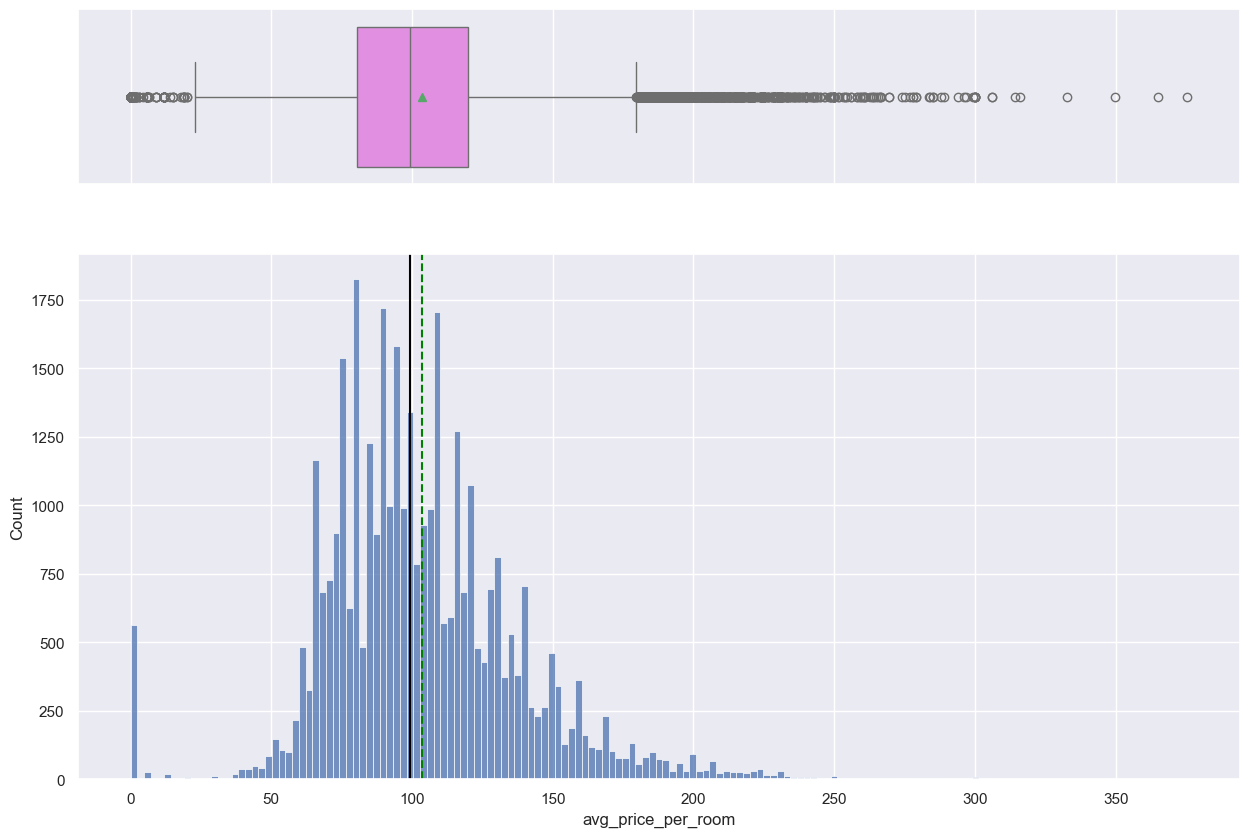

In [134]:
histogram_boxplot(dt_innData_filled, "avg_price_per_room")

- Outliers are removed and its evident based on the histogram shown above

**Preparing data for modeling**

- Handle the string Object `type_of_meal_plan`, `room_type_reserved` and `market_segment_type`using panda `one hot encoding`
- Split the data into train and test to be able to evaluate the model that we build on the train data
- Based on the business problem, we need to predict '`booking_status`', so this can be set to y.
- All other variables or aka `features` can be set to X

In [135]:
# create a final copy of dt_innData_filled. that way, we don't jeopradize the dataset
dt_innData_final = dt_innData_filled.copy()

In [136]:
dt_innData_final.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0              0  
1                       1              0  
2                       0              1  
3                       0              1  
4                       0              1

In [137]:
# Creating X features to predict y variables
dt_X = dt_innData_final.drop(["booking_status"], axis=1)
dt_y = dt_innData_final["booking_status"]

In [138]:
dt_X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  
0                       0  
1                       1  
2                       0  
3                       0  
4                       0

In [139]:
dt_y.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: category
Categories (2, int64): [1, 0]

**`one hot encoding``type_of_meal_plan`, `room_type_reserved` and `market_segment_type`**

In [140]:
dt_X = pd.get_dummies(
    dt_X,
    columns=dt_X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
)

In [141]:
dt_X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224          2017             10   
1                           0          5          2018             11   
2                           0          1          2018              2   
3                           0        211          2018              5   
4                           0         48          2018              4   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0                             0   
1             6               0                             0   
2            28               0                             0   
3            20               0                             0   
4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                          False   
1                       1                          False   
2                       0                          False   
3                       0                          False   
4                       0                          False   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                          False                           False   
1                          False                            True   
2                          False                           False   
3                          False                           False   
4                          False                            True   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                              False                          False   
1                              False                          False   
2                              False                          False   
3                              False  

In [142]:
# converting the input attributes into float type for modeling
dt_X = dt_X.astype(float)
dt_X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0           2.0             0.0                   1.0                2.0   
1           2.0             0.0                   2.0                3.0   
2           1.0             0.0                   2.0                1.0   
3           2.0             0.0                   0.0                2.0   
4           2.0             0.0                   1.0                1.0   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                         0.0      224.0        2017.0           10.0   
1                         0.0        5.0        2018.0           11.0   
2                         0.0        1.0        2018.0            2.0   
3                         0.0      211.0        2018.0            5.0   
4                         0.0       48.0        2018.0            4.0   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0           2.0             0.0                           0.0   
1           6.0             0.0                           0.0   
2          28.0             0.0                           0.0   
3          20.0             0.0                           0.0   
4          11.0             0.0                           0.0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                   0.0               65.00   
1                                   0.0              106.68   
2                                   0.0               60.00   
3                                   0.0              100.00   
4                                   0.0               94.50   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                     0.0                            0.0   
1                     1.0                            0.0   
2                     0.0                            0.0   
3                     0.0                            0.0   
4                     0.0                            0.0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                            0.0                             0.0   
1                            0.0                             1.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             1.0   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0  

**Split the data into 70:30 train:test**

In [143]:
# splitting the data in 70:30 ratio for train to test data
dt_X_train, dt_X_test, dt_y_train, dt_y_test = train_test_split(dt_X, dt_y, test_size=0.3, random_state=1)

In [144]:
print("Number of rows in dt train data =", dt_X_train.shape[0])
print("Number of rows in dt test data =", dt_X_test.shape[0])
print("Number of rows in dt train data =", dt_y_train.shape[0])
print("Number of rows in dt test data =", dt_y_test.shape[0])

Number of rows in dt train data = 25392
Number of rows in dt test data = 10883
Number of rows in dt train data = 25392
Number of rows in dt test data = 10883


**Defined the following methods to capture performance metrics**

1. dt_model_performance_metrics -- capture Precision, Recall and F1-score
2. dt_calculate_confusion_matrix -- capture confusion matrix

In [145]:
# Lets create method to calculare model performancce for decisiontree
# metrics to capture are Precision, Recall and F1-score
def dt_model_performance_metrics(
    model, predictors, target
):
    """
    Function to compute different metrics to check classification model performance

    model: decision tree
    predictors: independent variables
    target: dependent variable
    """
    # predict the model
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )
    return df_perf

In [146]:
def dt_calculate_confusion_matrix(model, predictors, target):
    
    """
    To plot the confusion_matrix with percentages

    model: decision tress
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)

    # Labels: TN, FP, FN, TP with count and % format
    labels = np.asarray(
        [
            ["True Negative\n{0}\n{1:.2%}".format(cm[0, 0], cm[0, 0] / cm.sum()),
             "False Positive\n{0}\n{1:.2%}".format(cm[0, 1], cm[0, 1] / cm.sum())],
            ["False Negative\n{0}\n{1:.2%}".format(cm[1, 0], cm[1, 0] / cm.sum()),
             "True Positive\n{0}\n{1:.2%}".format(cm[1, 1], cm[1, 1] / cm.sum())]
        ]
    )

    # Plot
    fig, ax = plt.subplots(figsize=(6, 4))
    for i in range(2):
        for j in range(2):
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=2))
            ax.text(j + 0.5, i + 0.5, labels[i, j],
                    ha="center", va="center", fontsize=12, color="black")

    # Add outer border around entire matrix
    ax.add_patch(plt.Rectangle((0, 0), 2, 2, fill=False, edgecolor='black', lw=3))

    # Axes formatting
    ax.set_xticks([0.5, 1.5])
    ax.set_xticklabels(["Pred: 0", "Pred: 1"])
    ax.set_yticks([0.5, 1.5])
    ax.set_yticklabels(["True: 0", "True: 1"])
    ax.invert_yaxis()
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_title("Confusion Matrix", fontsize=14)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

**Building Decision Tree Model**

Performance Metrics - Business case still holds good. We need to maximize the TPR over FPR. Recall metric is a key in combination with Precision and F1 Score.

### Default Parameters of `DecisionTreeClassifier(random_state=1)`

We are creating an instance of a `DecisionTreeClassifier` from **scikit-learn** with only one parameter explicitly set: `random_state=1`. This ensures reproducibility in how the splits are made during tree construction.

Below are the default values for the key parameters:

| Parameter             | Default Value | Description |
|-----------------------|---------------|-------------|
| `criterion`           | `"gini"`      | Function to measure the quality of a split. `"entropy"` is the other option. |
| `splitter`            | `"best"`      | Strategy used to choose the split at each node: `"best"` or `"random"`. |
| `max_depth`           | `None`        | No limit on the depth of the tree (can grow until all leaves are pure or have fewer than `min_samples_split` samples). |
| `min_samples_split`   | `2`           | Minimum number of samples required to split an internal node. |
| `min_samples_leaf`    | `1`           | Minimum number of samples required to be at a leaf node. |
| `max_features`        | `None`        | Number of features to consider when looking for the best split. |
| `max_leaf_nodes`      | `None`        | Grow tree with unlimited leaf nodes unless specified. |
| `class_weight`        | `None`        | All classes are treated with equal weight. |
| `random_state`        | `1`           | Controls the randomness of the estimator to ensure reproducibility. |


In [147]:
# instantiate DecisionTreeClassifier with randon_state
# note, default estimator is gini - function to measure the quality of the split. 
# class_weight is set to balanced, to avoid bias
dt_model_default = DecisionTreeClassifier(random_state=1,class_weight="balanced")
# fit the train dataset
dt_model_default.fit(dt_X_train, dt_y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [148]:
# check model performance on train data
dt_model_performance_metrics(dt_model_default, dt_X_train, dt_y_train)

Accuracy    Recall  Precision        F1
0  0.993108  0.995097   0.984153  0.989595

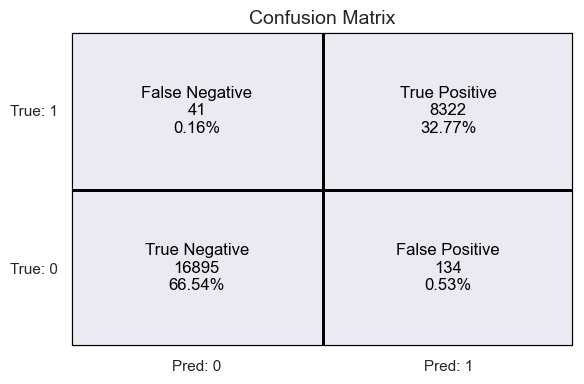

In [149]:
# evaluate confusion matrix on train data
dt_calculate_confusion_matrix(dt_model_default, dt_X_train, dt_y_train)

**Observation**

- The Default DecisionTree model is bound to create a perfect scenario by design that means, it will overfit the data to the bottom node/leaf of the decision tree
- This is evident by metrics like Accuracy is almost 100%, Recall is almost 99% and so Precision and F1 Score
- Confusion matrix is also similar like capturing almost all True Positive and all True negatives 

**Lets capture similar matrics on `Test` dataset**

In [150]:
# check model performance on test data
dt_model_performance_metrics(dt_model_default, dt_X_test, dt_y_test)

Accuracy    Recall  Precision        F1
0   0.86603  0.806076   0.785556  0.795684

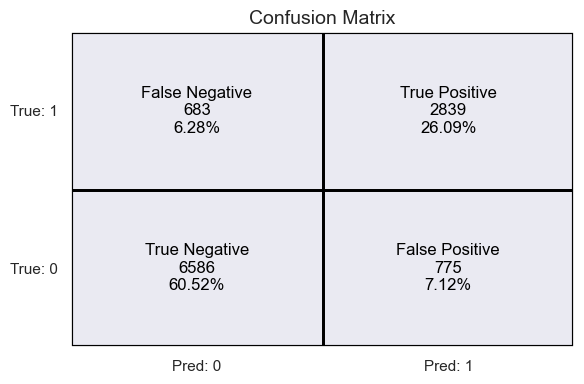

In [151]:
# evaluate confusion matrix on test data
dt_calculate_confusion_matrix(dt_model_default, dt_X_test, dt_y_test)

**Observation**

- Model is not performing that well in test data set.
- Accuracy (87%), Recall (81%), Precision (79%) and F1 (80%) as compare to `train` dataset they were very close to 100%
- This is understood since this is the `UNSEEN` data.

**There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.**

**Identify the important features**

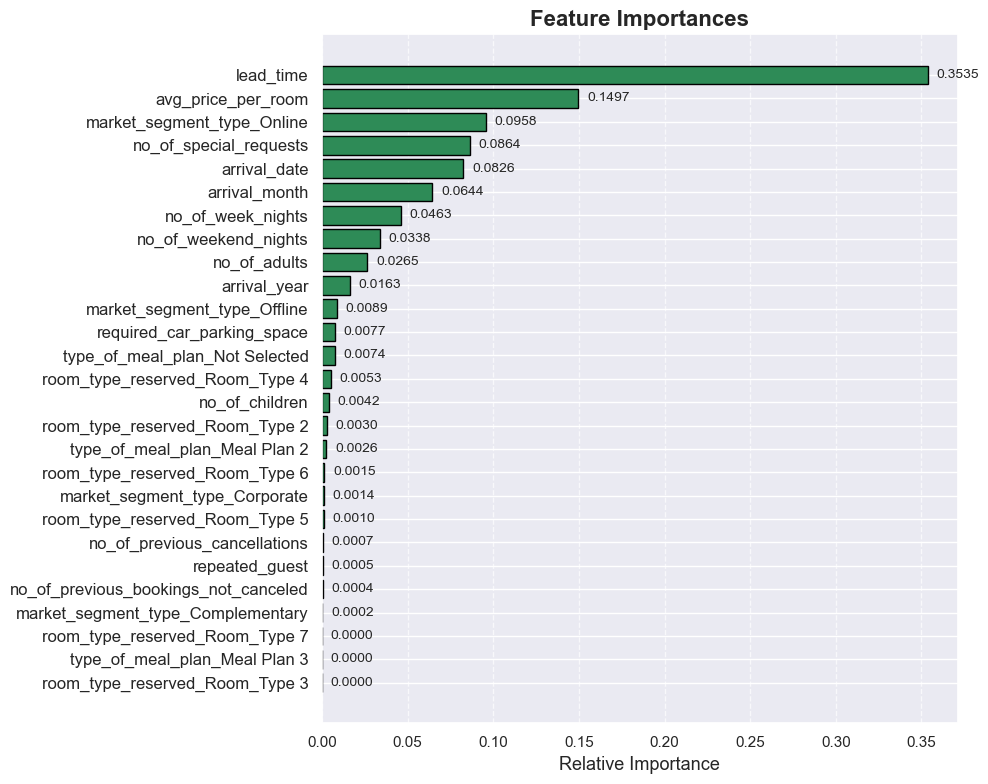

In [152]:
# Get feature names and importances
feature_names = list(dt_X_train.columns)
importances = dt_model_default.feature_importances_
indices = np.argsort(importances)

# Sort feature names by importance
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(10, 8))
plt.title("Feature Importances", fontsize=16, weight='bold')
bars = plt.barh(range(len(sorted_features)), sorted_importances, color="seagreen", align="center", edgecolor='black')
plt.yticks(range(len(sorted_features)), sorted_features, fontsize=12)
plt.xlabel("Relative Importance", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels next to bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{sorted_importances[i]:.4f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

## Do we need to prune the tree?

My anwer would be yes. Model is almost perfectly fitting (a.k.a overfitting) on the training data set but failing on test dataset. We can give a try 

- Pre Prune (adjusting hyper-parameter of the DecistionTree)
- Post Prune (alpha+impurity analysis)
- Evaluate the performance to defaul model on test dataset (both pre-prune and post-prune) and then analyze further.

**Pre Pruning**

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [153]:
# Choose the type of classifier.
dt_model_pre_prune = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_model_pre_prune, parameters, scoring=acc_scorer, cv=5) # this will create 5 dataset with 80:20 split
grid_obj = grid_obj.fit(dt_X_train, dt_y_train)

# Set the clf to the best combination of parameters
dt_model_pre_prune = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_pre_prune.fit(dt_X_train, dt_y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

- class_weight='balanced': handles class imbalance by adjusting weights inversely proportional to class frequencies.
- max_depth=2: tree is shallow, likely helping generalization and reducing overfitting.
- max_leaf_nodes=50: restricts the complexity of the tree.
- min_samples_split=10: node must have at least 10 samples to be split, avoiding overly fine splits.

**Evaluate**

In [154]:
# check model performance on train data
dt_model_performance_metrics(dt_model_pre_prune, dt_X_train, dt_y_train)

Accuracy    Recall  Precision        F1
0  0.618541  0.856511   0.457729  0.596618

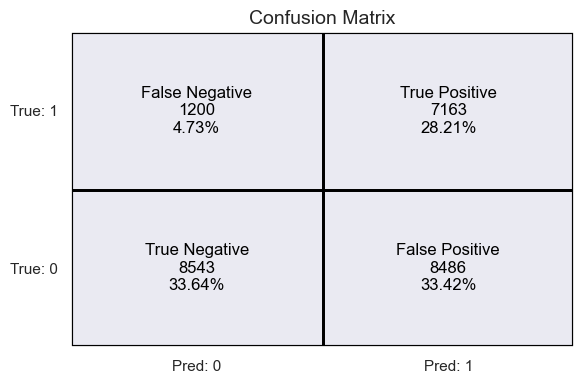

In [155]:
# evaluate confusion matrix on train data
dt_calculate_confusion_matrix(dt_model_pre_prune, dt_X_train, dt_y_train)

In [156]:
# check model performance on test data
dt_model_performance_metrics(dt_model_pre_prune, dt_X_test, dt_y_test)

Accuracy    Recall  Precision        F1
0  0.618396  0.862294   0.452946  0.593918

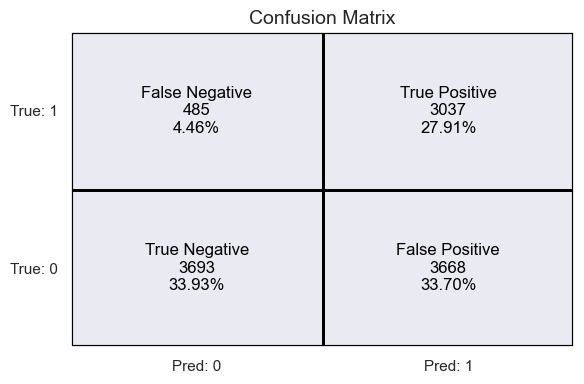

In [157]:
# evaluate confusion matrix on test data
dt_calculate_confusion_matrix(dt_model_pre_prune, dt_X_test, dt_y_test)

**Observation**

- Metrics over Train dataset and Test dataset is comparable. That means, Model is able to generalize well.
- Recall on `train data` lowered :
       - `default model` (overfitted) recall is 99.5%.
       -  `pre_prune model` recall is 85%
    **This means with pre-pruning, model on training data set is not overfitting and also able to generalize well. This is also evident below where the recall improved in the test dataset**

- Recall on `test data` significantly improved :
       - `default model` (overfitted) recall is 81%.
       -  `pre_prune model` recall is 86%

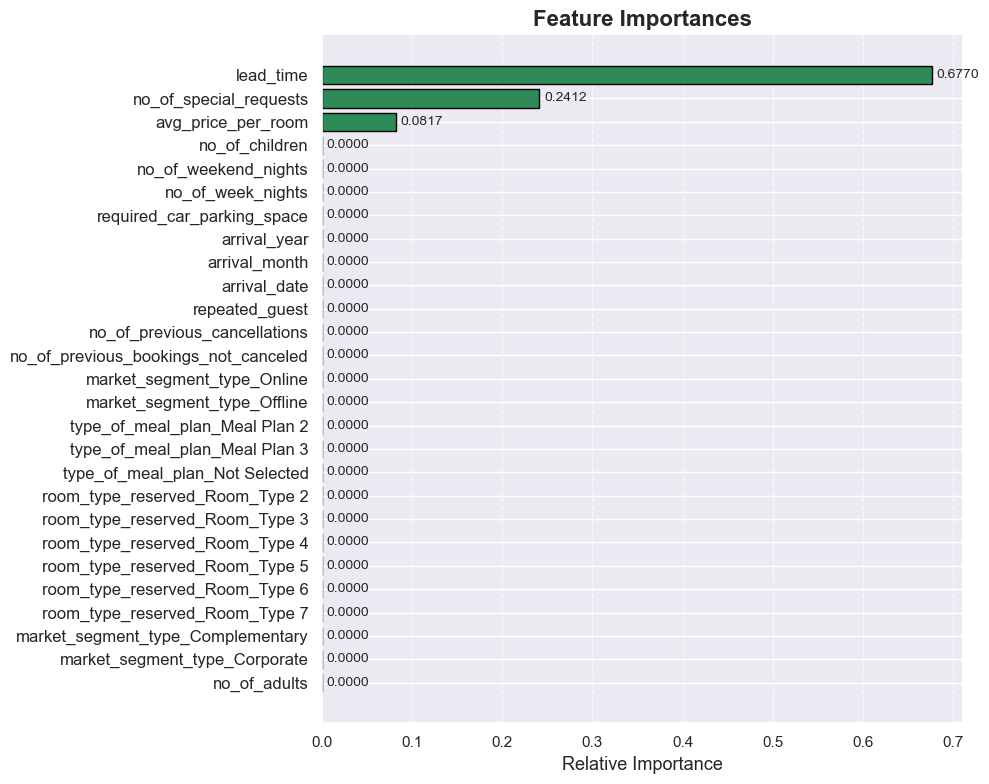

In [158]:
# Get feature names and importances
feature_names = list(dt_X_train.columns)
importances = dt_model_pre_prune.feature_importances_
indices = np.argsort(importances)

# Sort feature names by importance
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(10, 8))
plt.title("Feature Importances", fontsize=16, weight='bold')
bars = plt.barh(range(len(sorted_features)), sorted_importances, color="seagreen", align="center", edgecolor='black')
plt.yticks(range(len(sorted_features)), sorted_features, fontsize=12)
plt.xlabel("Relative Importance", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels next to bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{sorted_importances[i]:.4f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Display the Pre Pruning DecisionTree for Visulaization**

In [159]:
feature_names = list(dt_X_train.columns)
importances = dt_model_pre_prune.feature_importances_
indices = np.argsort(importances)

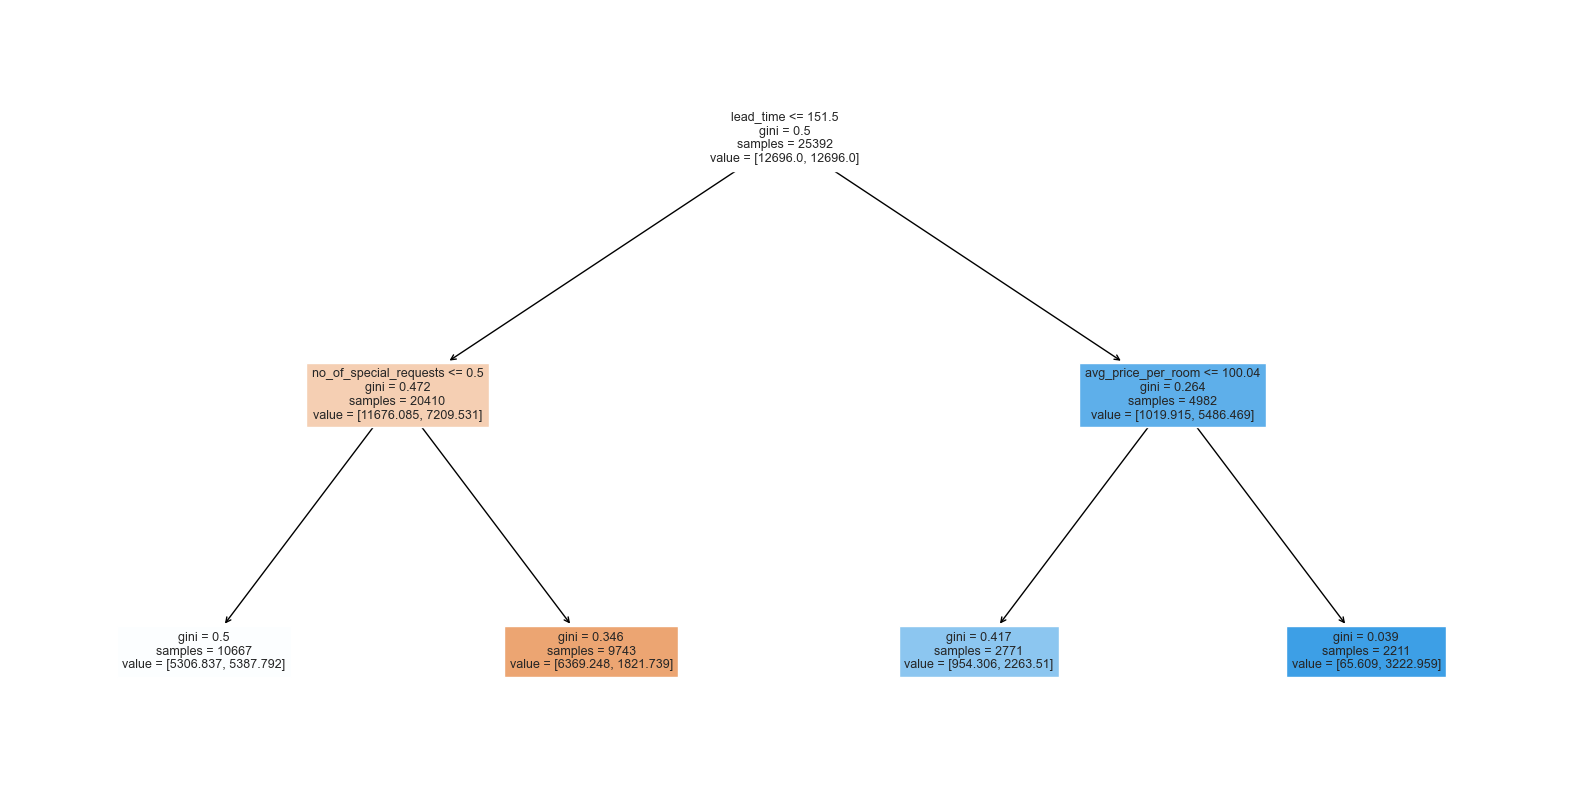

In [160]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    dt_model_pre_prune,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

### Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [161]:
# find the cost complexity pruning path on training dataset
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(dt_X_train, dt_y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [162]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008376
1     0.000000e+00    0.008376
2     2.933821e-20    0.008376
3     2.933821e-20    0.008376
4     2.933821e-20    0.008376
...            ...         ...
1853  8.901596e-03    0.328058
1854  9.802243e-03    0.337860
1855  1.271875e-02    0.350579
1856  3.412090e-02    0.418821
1857  8.117914e-02    0.500000

[1858 rows x 2 columns]

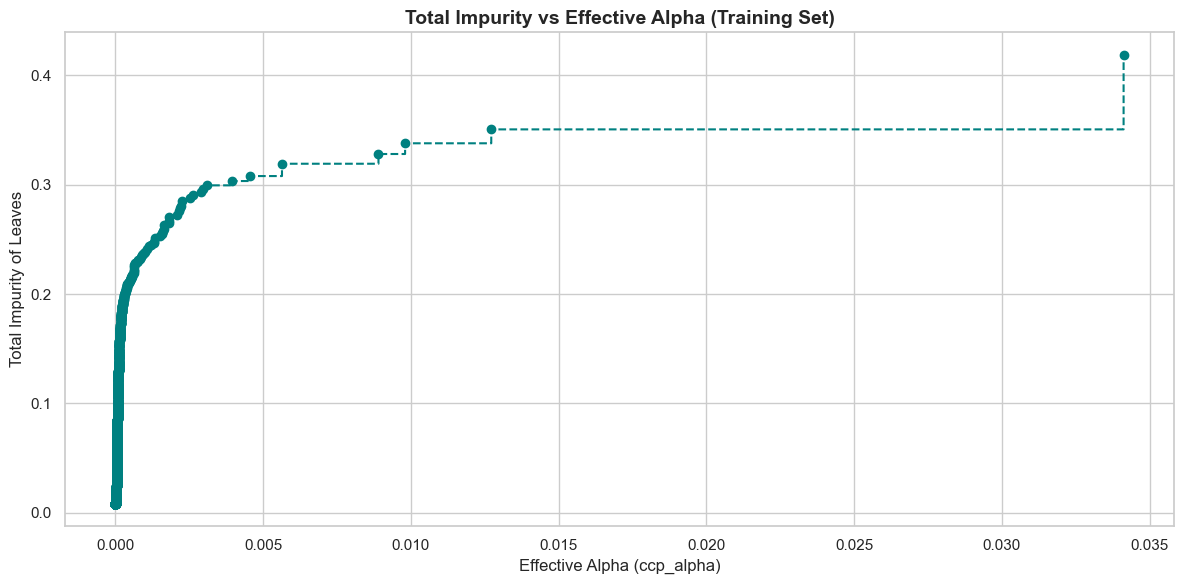

In [163]:
# Use seaborn style
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", linestyle="--", color="teal", drawstyle="steps-post")

# Add labels and title
ax.set_xlabel("Effective Alpha (ccp_alpha)", fontsize=12)
ax.set_ylabel("Total Impurity of Leaves", fontsize=12)
ax.set_title("Total Impurity vs Effective Alpha (Training Set)", fontsize=14, weight='bold')

# Add grid and tighter layout
ax.grid(True)
plt.tight_layout()
plt.show()

As `ccp_alphas` increases, so the impurity, which make sense. 

Next, we train a decision tree using the effective alphas. The last value in ``ccp_alphas`` is the alpha value that prunes the whole tree, leaving the tree, ``clfs[-1]``, with one node.

### Training Decision Trees with Different `ccp_alpha` Values

This code trains a series of Decision Tree models using different values of `ccp_alpha`, which controls the **cost-complexity pruning**. For each value of `ccp_alpha`:

- A new decision tree is created with that pruning strength.
- The tree is trained on the training dataset.
- The trained model is stored in a list `clfs`.

Finally, it prints out the number of nodes in the last (most pruned) tree and the corresponding `ccp_alpha` used. This helps us analyze how pruning affects model complexity.

In [164]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(dt_X_train, dt_y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136915


### Visualizing How Pruning Affects Tree Size and Depth

After training multiple decision trees with different `ccp_alpha` values, this code:

- Removes the last (most pruned) tree, which is often just a root node and not useful for evaluation.
- Calculates the **number of nodes** and **maximum depth** for each tree.

It then plots:
1. **Number of nodes vs alpha** – shows how the tree size decreases as `alpha` increases.
2. **Depth of tree vs alpha** – shows how the depth of the tree also becomes shallower with more pruning.

These plots help us understand how pruning simplifies the model.

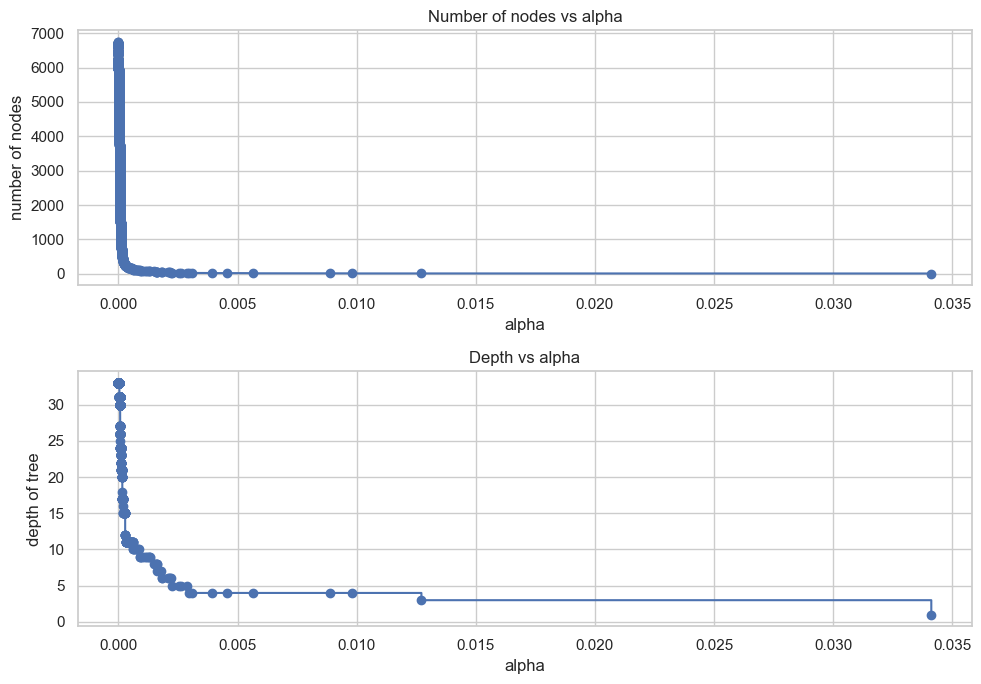

In [165]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Calculating Recall for Training Set Across Different Trees

This code calculates the **recall score** for each decision tree trained with a different `ccp_alpha` value.

- For every tree in the list `clfs`, it:
  - Predicts the training labels.
  - Computes the **recall**, which tells us how many actual positive cases were correctly identified.
  - Stores the recall scores in a list `recall_train`.
- This helps track how model performance (in terms of recall) changes as the tree is pruned more.

In [166]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(dt_X_train)
    values_train = recall_score(dt_y_train, pred_train)
    recall_train.append(values_train)

### Calculating Recall for Test Set Across Different Trees

This code calculates the **recall score** for each decision tree using the test data.

- For each tree in the list `clfs`, it:
  - Predicts the labels on the test set.
  - Computes the **recall**, showing how well the model identifies actual positive cases.
  - Stores each recall score in the list `recall_test`.

This allows us to compare how pruning (via `ccp_alpha`) affects the model’s generalization to unseen data.

In [167]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(dt_X_test)
    values_test = recall_score(dt_y_test, pred_test)
    recall_test.append(values_test)

### Calculating Accuracy for Train and Test Sets

This code calculates the **accuracy score** for each decision tree on both the training and test datasets.

- `train_scores`: Accuracy of each model on the **training set**.
- `test_scores`: Accuracy of each model on the **test set**.

This helps us see how model performance changes with different levels of pruning (based on `ccp_alpha`) and whether the model is overfitting or underfitting.

In [168]:
train_scores = [clf.score(dt_X_train, dt_y_train) for clf in clfs]
test_scores = [clf.score(dt_X_test, dt_y_test) for clf in clfs]

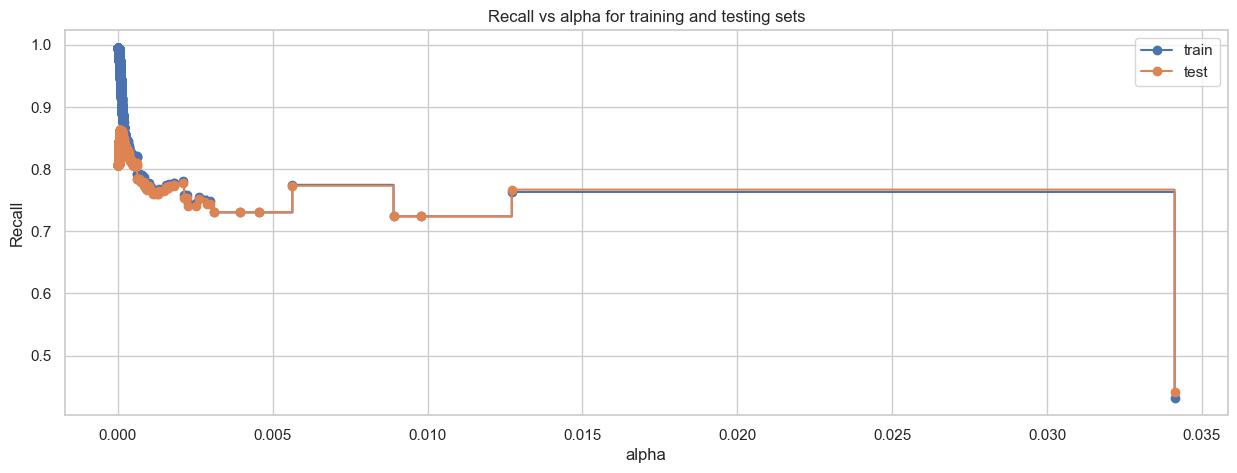

In [169]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Observation**

- alpha is 0, the model learns everything in the training data, so the Recall is 100% — but this also means it's overfitting.
- On the test data, the Recall is around 86%, which shows the model doesn’t work as perfectly on new data. As we increase alpha, we make the model simpler to avoid overfitting, but the Recall goes down for both training and testing. This shows the balance between learning the training data well and doing well on new, unseen data.

### Selecting the Best Model Based on Test Recall

This code identifies and selects the best decision tree model from our list of pruned trees.

- `recall_test` contains recall values for each model on the test set.
- `np.argmax(recall_test)` finds the index of the model with the **highest recall** on the test set.
- `dt_model_post_prune` is assigned to the corresponding tree from `clfs`.

This model is likely to balance performance and generalization the best, especially for recall-focused use cases.

In [170]:
# creating the model where we get highest train and test recall
index_best_model_recall = np.argmax(recall_test)
dt_model_post_prune_recall = clfs[index_best_model_recall]
print(dt_model_post_prune_recall)

DecisionTreeClassifier(ccp_alpha=8.046650001478856e-05, class_weight='balanced',
                       random_state=1)


**Observation**

- This is the best model where we get the highest train and test recall.
- `Hyperparameter` **ccp_alpha**=`8.046650001478856e-05`, **class_weight**=`balanced`

In [171]:
# check model performance on train data
dt_model_performance_metrics(dt_model_post_prune_recall, dt_X_train, dt_y_train)

Accuracy    Recall  Precision        F1
0  0.926985  0.951333   0.846113  0.895643

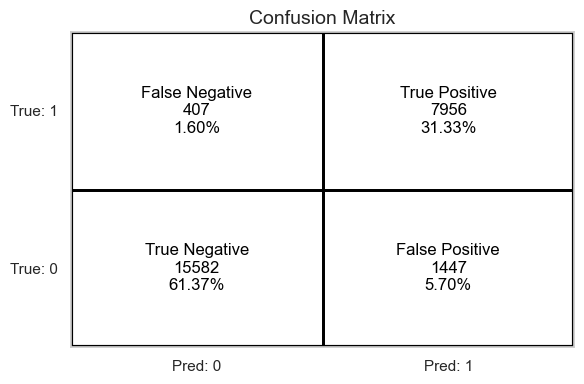

In [172]:
# evaluate confusion matrix on train data
dt_calculate_confusion_matrix(dt_model_post_prune_recall, dt_X_train, dt_y_train)

In [173]:
# check model performance on test data
dt_model_performance_metrics(dt_model_post_prune_recall, dt_X_test, dt_y_test)

Accuracy   Recall  Precision        F1
0  0.864008  0.86343   0.752723  0.804285

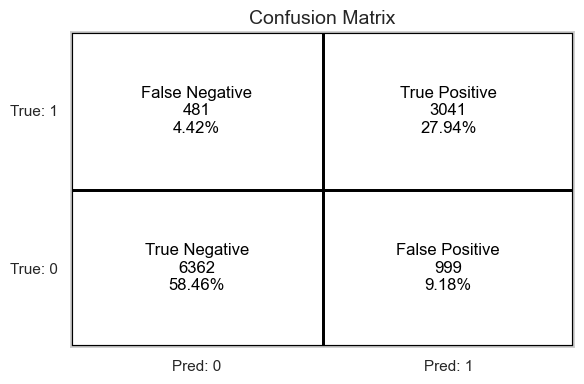

In [174]:
# evaluate confusion matrix on test data
dt_calculate_confusion_matrix(dt_model_post_prune_recall, dt_X_test, dt_y_test)

**Observation**

If I select Recall metrics to get the best index of the model with the **highest recall** on the test set

- Recall on training dataset is 95.1%
- Reall of test dataset is 86.3%

I think, I would like to test the F1 score as well. Reason is that F1 score is calculated on Recall and Precision. I just want to see if this improve the performance of the model on the test dataset.

#### F1 Score vs alpha for training and testing sets

In [175]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(dt_X_train)
    values_train = f1_score(dt_y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(dt_X_test)
    values_test = f1_score(dt_y_test, pred_test)
    f1_test.append(values_test)

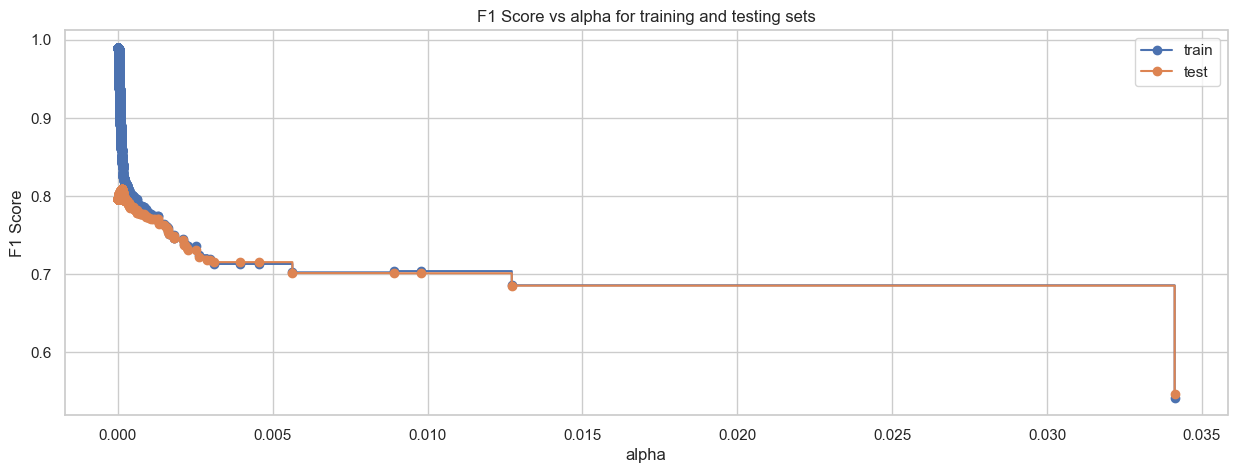

In [176]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [177]:
index_best_model_f1 = np.argmax(f1_test)
dt_model_post_prune_f1 = clfs[index_best_model_f1]
print(dt_model_post_prune_f1)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167048,
                       class_weight='balanced', random_state=1)


In [178]:
# check model performance on train data
dt_model_performance_metrics(dt_model_post_prune_f1, dt_X_train, dt_y_train)

Accuracy    Recall  Precision        F1
0  0.899929  0.902906   0.813685  0.855977

In [179]:
# check model performance on test data
dt_model_performance_metrics(dt_model_post_prune_f1, dt_X_test, dt_y_test)

Accuracy    Recall  Precision       F1
0  0.869429  0.856616   0.767099  0.80939

**Observation**

When selecting the model based on the highest F1 score on the test set:

- F1 score on the training dataset is 85.5%
- F1 score on the test dataset is 80.9%

This suggests that the model is generalizing well, as it's able to maintain strong predictive performance on unseen data with an F1 score of 80.9%.

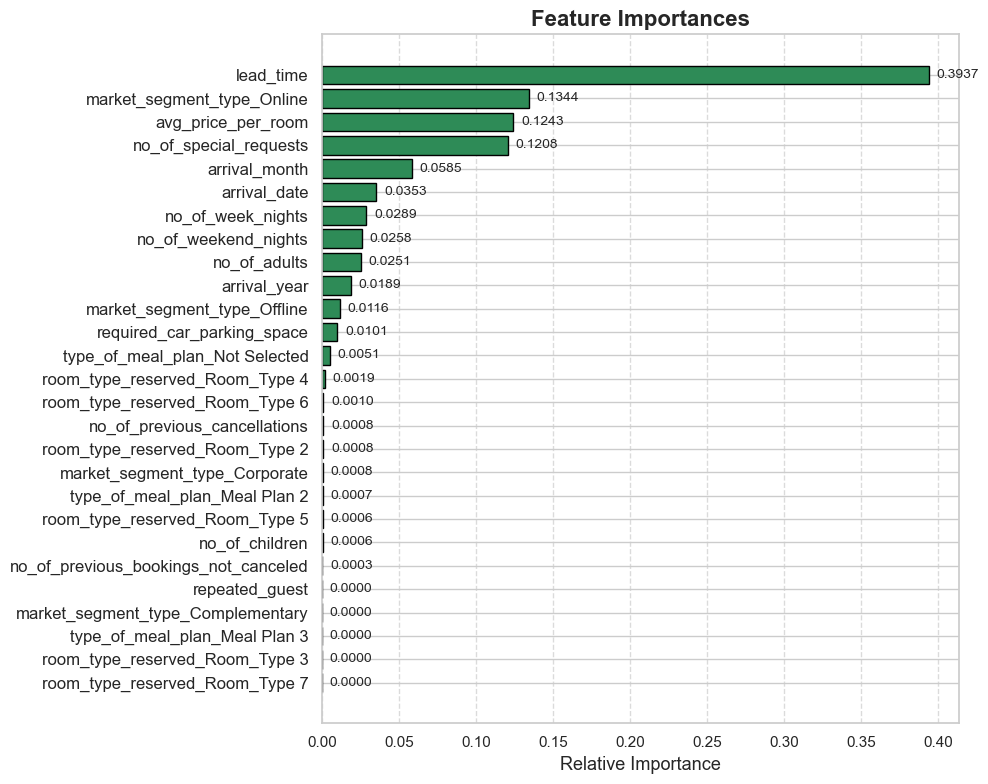

In [180]:
# Get feature names and importances
feature_names = list(dt_X_train.columns)
importances = dt_model_post_prune_f1.feature_importances_
indices = np.argsort(importances)

# Sort feature names by importance
sorted_features = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(10, 8))
plt.title("Feature Importances", fontsize=16, weight='bold')
bars = plt.barh(range(len(sorted_features)), sorted_importances, color="seagreen", align="center", edgecolor='black')
plt.yticks(range(len(sorted_features)), sorted_features, fontsize=12)
plt.xlabel("Relative Importance", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value labels next to bars
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{sorted_importances[i]:.4f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

**Display the Post Pruning `F1` DecisionTree for Visulaization**

In [181]:
feature_names = list(dt_X_train.columns)
importances = dt_model_post_prune_f1.feature_importances_
indices = np.argsort(importances)

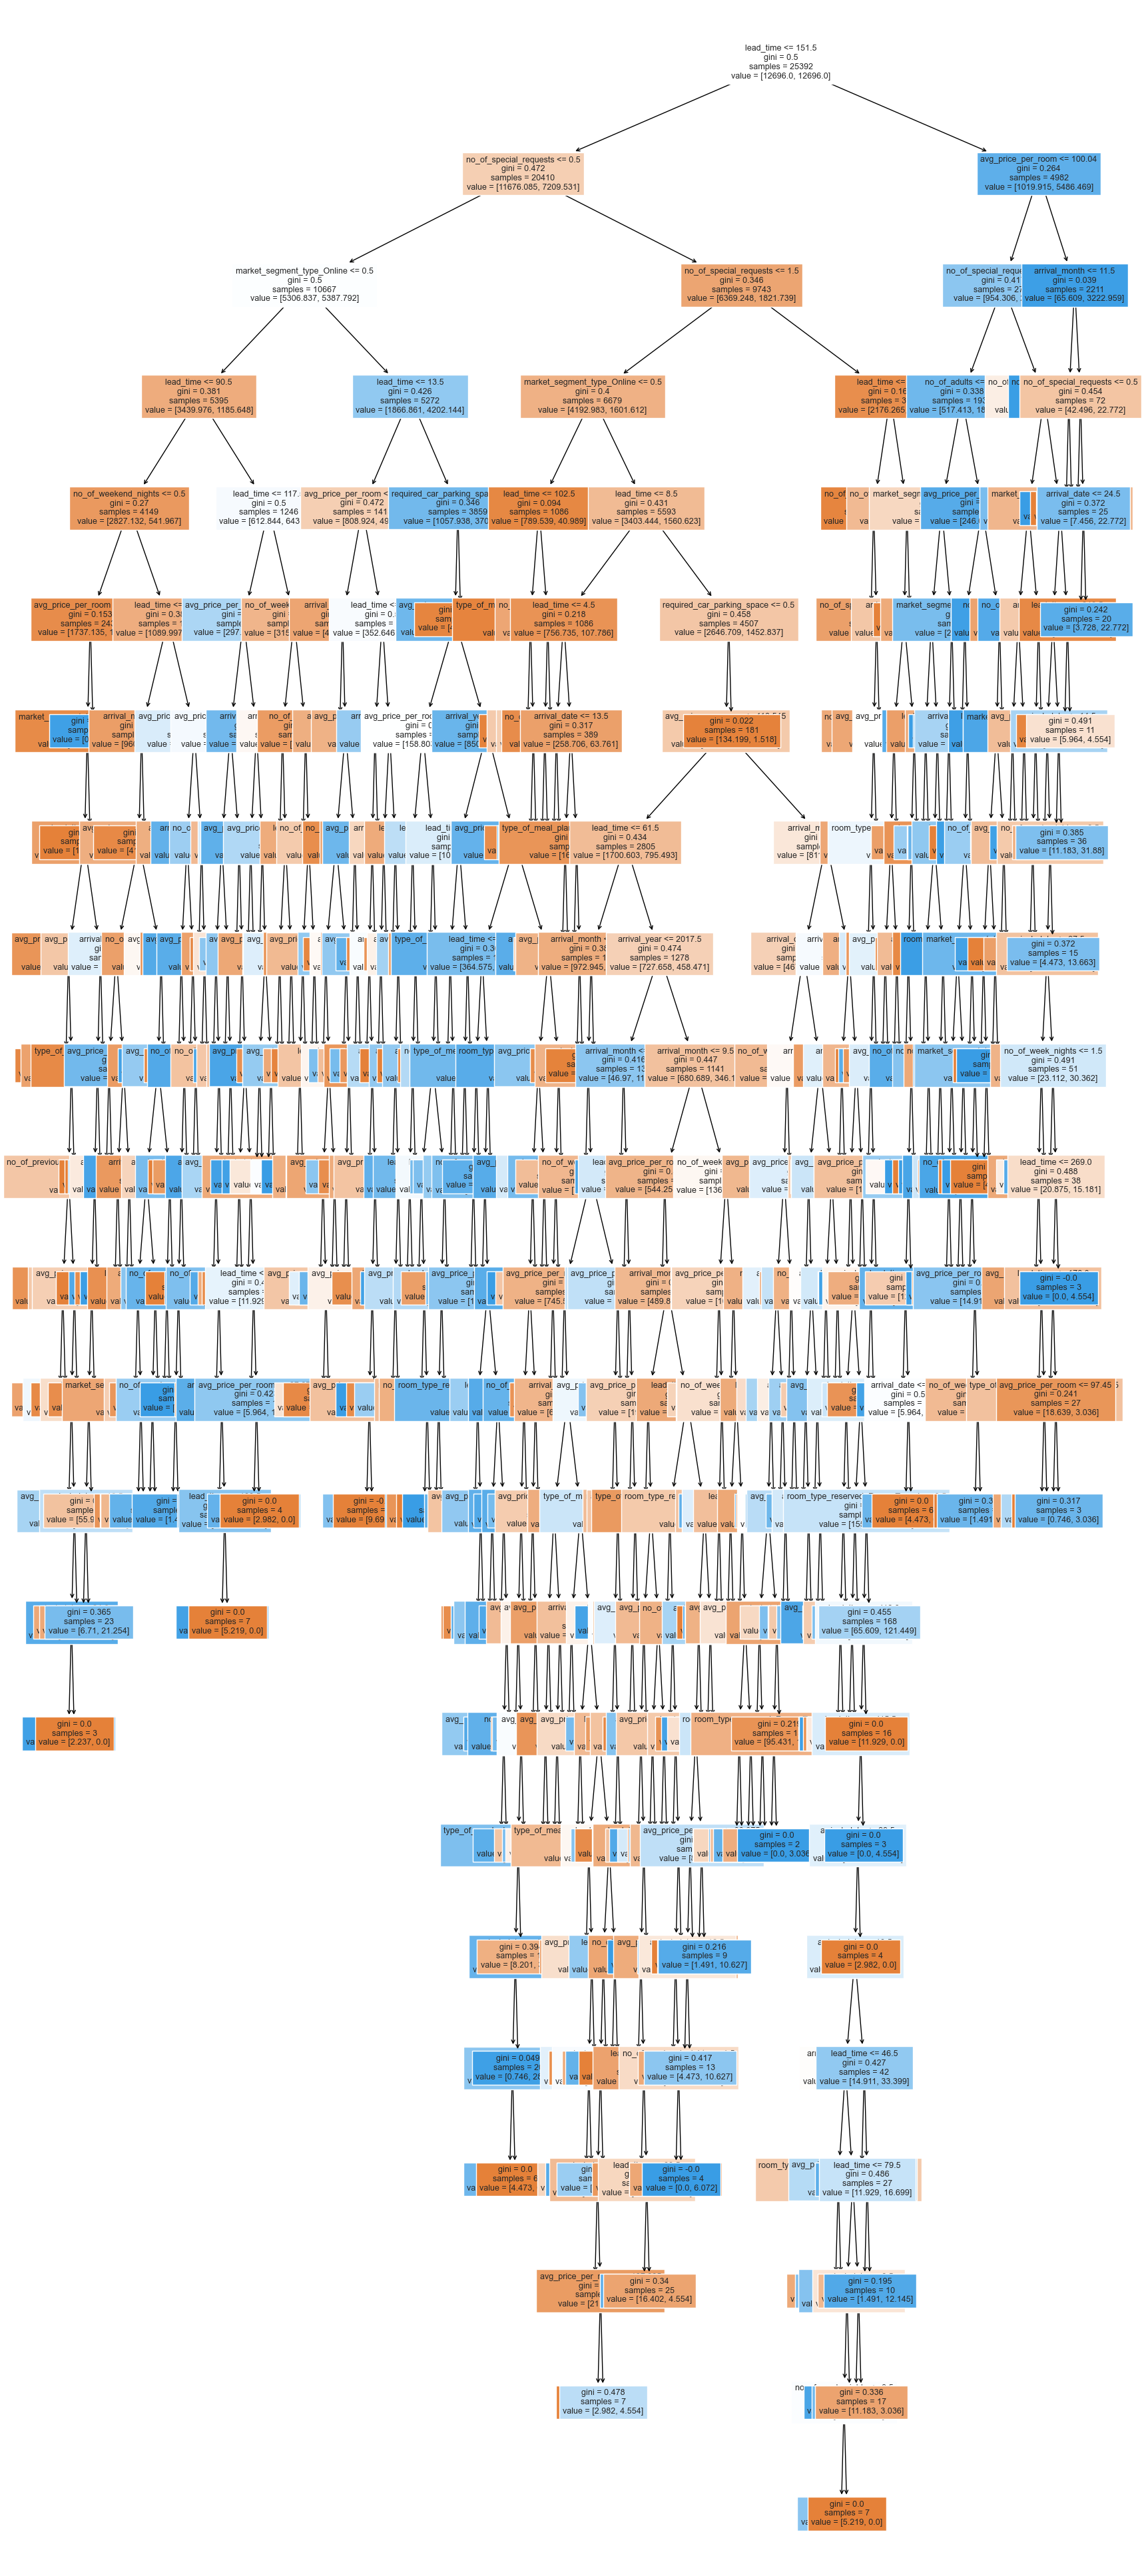

In [182]:
plt.figure(figsize=(20, 50))
out = tree.plot_tree(
    dt_model_post_prune_f1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

## Model Performance Comparison and Conclusions

**Multiple DecisionTree models have been created**

- Default DecisionTree model `dt_model_default`
- Pre-Pruned DecisionTree model `dt_model_pre_prune`
- Post-Pruned DecisionTress model `dt_model_post_prune_recall`
- Post-Pruned DecisionTress model `dt_model_post_prune_f1`

In [183]:
# Define models with names
model_dict = {
    "Decision Tree sklearn": dt_model_default,
    "Decision Tree (Pre-Pruning)": dt_model_pre_prune,
    "Decision Tree (Post-Pruning Recall)": dt_model_post_prune_recall,
    "Decision Tree (Post-Pruning F1)": dt_model_post_prune_f1,
}

def get_model_performance_df(model_dict, X, y):
    """Compute and return model performance metrics as a comparison DataFrame."""
    metrics = {}
    for name, model in model_dict.items():
        perf_df = dt_model_performance_metrics(model, X, y)
        metrics[name] = perf_df.iloc[0]  # extract the single row as a Series
    return pd.DataFrame(metrics)

# Training performance
models_train_comp_df = get_model_performance_df(model_dict, dt_X_train, dt_y_train)
print("=============================================================================================================================")
print("Training performance comparison:")
print("=============================================================================================================================")
display(models_train_comp_df)

# Test performance
models_test_comp_df = get_model_performance_df(model_dict, dt_X_test, dt_y_test)
print("=============================================================================================================================")
print("Test performance comparison:")
print("=============================================================================================================================")
display(models_test_comp_df)

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.993108                     0.618541   
Recall                  0.995097                     0.856511   
Precision               0.984153                     0.457729   
F1                      0.989595                     0.596618   

           Decision Tree (Post-Pruning Recall)  \
Accuracy                              0.926985   
Recall                                0.951333   
Precision                             0.846113   
F1                                    0.895643   

           Decision Tree (Post-Pruning F1)  
Accuracy                          0.899929  
Recall                            0.902906  
Precision                         0.813685  
F1                                0.855977

Test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.866030                     0.618396   
Recall                  0.806076                     0.862294   
Precision               0.785556                     0.452946   
F1                      0.795684                     0.593918   

           Decision Tree (Post-Pruning Recall)  \
Accuracy                              0.864008   
Recall                                0.863430   
Precision                             0.752723   
F1                                    0.804285   

           Decision Tree (Post-Pruning F1)  
Accuracy                          0.869429  
Recall                            0.856616  
Precision                         0.767099  
F1                                0.809390

**Observation**

Best Model Recommendation: Post-Pruning (F1)

- It has balanced train-test F1 scores, which suggests it's not overfitting or underfitting.
- Highest Test F1 (0.809): Since F1 balances precision and recall, this indicates it's the best at handling class imbalance while making correct predictions on unseen data.


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

**What profitable policies for cancellations and refunds can the hotel adopt?**

### Insights from Logistic Regression Model

The model identified **key factors linked to higher cancellations**:
- **Previous cancellations** → 26% higher odds  
- **Long lead times** → 57% higher odds  
- **New guests (not repeat)** → 93% *lower* chance of commitment

---

### Insights from DecisionTree Post-Pruned F1 Model

- **High F1 score** on both train (0.85) and test (0.81) → shows generalization with strong precision-recall balance
- No overfitting like the default model, and better performance than pre-pruning model

---

Both Logistic Regression and Decision Tree models show good performance in predicting cancellations. The F1 scores on training and test sets are strong, meaning the models work well on new data too. Together, they help identify high-risk bookings and support better cancellation policies.

I think, we can offer the followings:

**Policy related to Risk-Based Cancellation Rules**

For **High-risk guests** : stricter policies like `Non-refundable rates` and `Deadline: cancel at least 21 days in advance`
For **Low-risk guests** :  flexible options like Full refund up to 24 hrs and `Loyalty` perks for `repeat customers`  


**Policy on Early Cancellations** by `Lowering decision threshold to **0.369**` which improved **Recall** from 63% → **74%** and **F1 score** improved


**What other recommedations would you suggest to the hotel?**

- Engage High Risks guest early
- Reward Loyalty
- Automated emails/alerts/text messages for reminders
- Incentivize Commitment like offering small discounts or upgrades for choosing non-refundable or partially refundable options.